# Project - CCPS 844 - Data Mining

# Justin Stosic - 500871397

# Dataset: https://archive.ics.uci.edu/ml/datasets/DrivFace

The DrivFace database contains images sequences of subjects while driving in real scenarios. It is composed of 606 samples of 640Ã—480 pixels each, acquired over different days from 4 drivers (2 women and 2 men) with several facial features like glasses and beard.
The ground truth contains the annotation of the face bounding box and the facial key points (eyes, nose and mouth).
A set of labels assigning each image into 3 possible gaze direction classes are given.
The first class is the looking-right class and contains the head angles between -45Âº and -30Âº.
The second one is the frontal class and contains the head angles between -15Âº and 15Âº.
The last one is the looking-left class and contains the head angles between 30Âº and 45Âº. 

Column Headers are described as follows:
-fileName is the imagen's name into DrivImages.zip
-subject = [1:4]
-imgNum = int
-label = [1/2/3] (head pose class that corresponding to [lr/f/lf], respectively)
-ang = [-45, -30/ -15 0 15/ 30 15] (head pose angle)
-[xF yF wF hF] = face position
-[xRE yRE] = rigth eye position
-[xLE yL] = left eye position
-[xN yN] = Nose position
-[xRM yRM] = rigth corner of mouth
-[xLM yLM] = left corner of mouth

In [1]:
# Import appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import copy
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Select datasets and visualize

In [2]:
# Read in data and display info
dataset = pd.read_csv('drivPoints.txt', index_col = 0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 20130529_01_Driv_001_f  to 20130530_04_Driv_090_f 
Data columns (total 18 columns):
subject    606 non-null int64
imgNum     606 non-null int64
label      606 non-null int64
ang        606 non-null int64
xF         606 non-null int64
yF         606 non-null int64
wF         606 non-null int64
hF         606 non-null int64
xRE        606 non-null int64
yRE        606 non-null int64
xLE        606 non-null int64
yLE        606 non-null int64
xN         606 non-null int64
yN         606 non-null int64
xRM        606 non-null int64
yRM        606 non-null int64
xLM        606 non-null int64
yLM        606 non-null int64
dtypes: int64(18)
memory usage: 90.0+ KB


In [3]:
dataset.head()

subject  imgNum  label  ang   xF   yF   wF   hF  xRE  \
fileName                                                                        
20130529_01_Driv_001_f         1       1      2    0  292  209  100  112  323   
20130529_01_Driv_002_f         1       2      2    0  286  200  109  128  324   
20130529_01_Driv_003_f         1       3      2    0  290  204  105  121  325   
20130529_01_Driv_004_f         1       4      2    0  287  202  112  118  325   
20130529_01_Driv_005_f         1       5      2    0  290  193  104  119  325   

                         yRE  xLE  yLE   xN   yN  xRM  yRM  xLM  yLM  
fileName                                                              
20130529_01_Driv_001_f   232  367  231  353  254  332  278  361  278  
20130529_01_Driv_002_f   235  366  235  353  258  333  281  361  281  
20130529_01_Driv_003_f   240  367  239  351  260  334  282  362  282  
20130529_01_Driv_004_f   230  369  230  353  253  335  274  362  275  
20130529_01_Driv_005_f   224  366  225  353  244  333  268  363  268

In [4]:
# Lets group the individual persons (4 ppl total) against their facial characteristics.  Could be useful later.
X_subject_1 = dataset[dataset['subject'] == 1]
X_subject_2 = dataset[dataset['subject'] == 2]
X_subject_3 = dataset[dataset['subject'] == 3]
X_subject_4 = dataset[dataset['subject'] == 4]

In [5]:
X_subject_1.head()

subject  imgNum  label  ang   xF   yF   wF   hF  xRE  \
fileName                                                                        
20130529_01_Driv_001_f         1       1      2    0  292  209  100  112  323   
20130529_01_Driv_002_f         1       2      2    0  286  200  109  128  324   
20130529_01_Driv_003_f         1       3      2    0  290  204  105  121  325   
20130529_01_Driv_004_f         1       4      2    0  287  202  112  118  325   
20130529_01_Driv_005_f         1       5      2    0  290  193  104  119  325   

                         yRE  xLE  yLE   xN   yN  xRM  yRM  xLM  yLM  
fileName                                                              
20130529_01_Driv_001_f   232  367  231  353  254  332  278  361  278  
20130529_01_Driv_002_f   235  366  235  353  258  333  281  361  281  
20130529_01_Driv_003_f   240  367  239  351  260  334  282  362  282  
20130529_01_Driv_004_f   230  369  230  353  253  335  274  362  275  
20130529_01_Driv_005_f   224  366  225  353  244  333  268  363  268

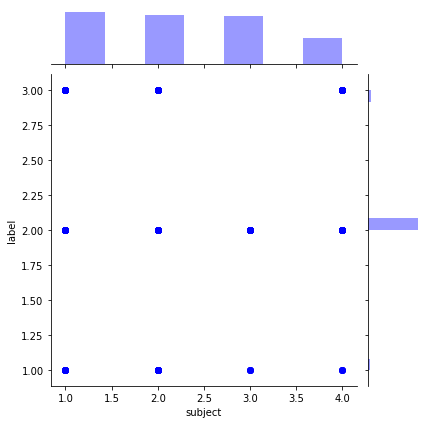

In [6]:
# A jointplot will allow us to see the distributions of the x,y axis.  Lets plot subjects against the label.

sea.jointplot(x = "subject", y = "label", data = dataset, color = "blue")

In [7]:
# From this we can see the number of readings of each subject is approx equal,
# with the exception of the number of subject 4 readings (along top axis) being 
# lower than the others.  We can also see that the majority of the time the 
# subjects are looking forward (label = 2), and only minimally do they look to the 
# left (label = 1) or to the right (label = 3).  

In [8]:
# Lets count the number of each label to verify.
print(dataset[dataset['label'] == 1].count())
print(dataset[dataset['label'] == 2].count())
print(dataset[dataset['label'] == 3].count())

subject    27
imgNum     27
label      27
ang        27
xF         27
yF         27
wF         27
hF         27
xRE        27
yRE        27
xLE        27
yLE        27
xN         27
yN         27
xRM        27
yRM        27
xLM        27
yLM        27
dtype: int64
subject    546
imgNum     546
label      546
ang        546
xF         546
yF         546
wF         546
hF         546
xRE        546
yRE        546
xLE        546
yLE        546
xN         546
yN         546
xRM        546
yRM        546
xLM        546
yLM        546
dtype: int64
subject    33
imgNum     33
label      33
ang        33
xF         33
yF         33
wF         33
hF         33
xRE        33
yRE        33
xLE        33
yLE        33
xN         33
yN         33
xRM        33
yRM        33
xLM        33
yLM        33
dtype: int64


In [9]:
# Looking forward = 546, looking left = 27, looking right = 33

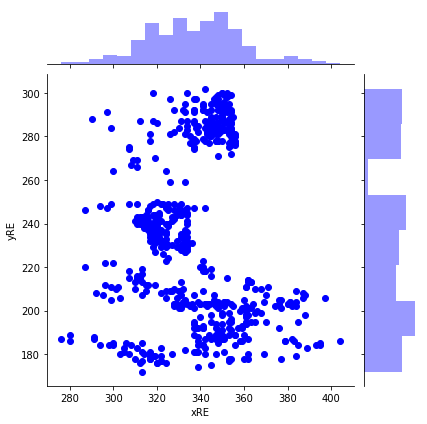

In [10]:
# Let's try plotting the eye movements of all subjects.

# First plot is the x, y coordinates of the right eye movements
sea.jointplot(x = "xRE", y = "yRE", data = dataset, color = "blue")

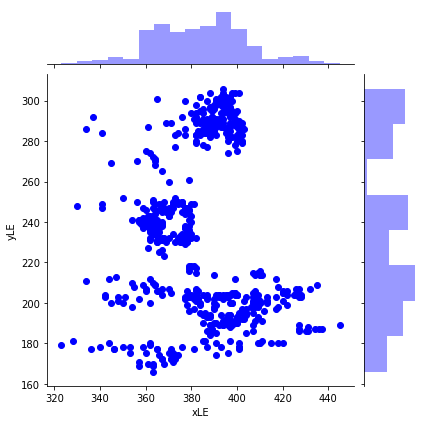

In [11]:
# This plot is the x, y coordinates of the left eye
sea.jointplot(x = "xLE", y = "yLE", data = dataset, color = "blue")

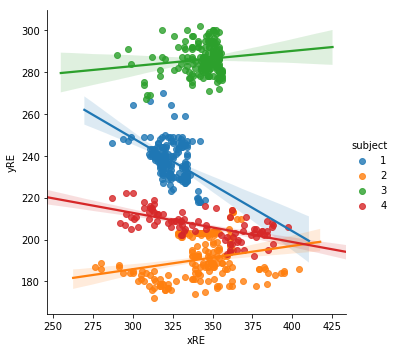

In [12]:
# Data between the right and left eye movements are quite similair, as it should be as eyes
# move in tandem.

# Try viewing the eye movements of each subject via hue set to identify each subject
sea.lmplot(x = 'xRE', y = 'yRE', hue = 'subject', data = dataset, fit_reg = True)

In [13]:
# We can see that each subject has a unique distribution of eye movements.  This could likely be used 
# to identify a specific subject based on their eye movements.
# We can assume that subjects 3's eyes are on average fixed on a point in the distance and mainly looks forward.
# Subject 1's eyes are fixed lower, but mainly forward as well.  Subject 4 looks below subject 1 and has
# a tendancy to scan with their eyes to the left and right. Subject 2 looks down the most, scans left and right,
# and looks up slightly farther down the road.

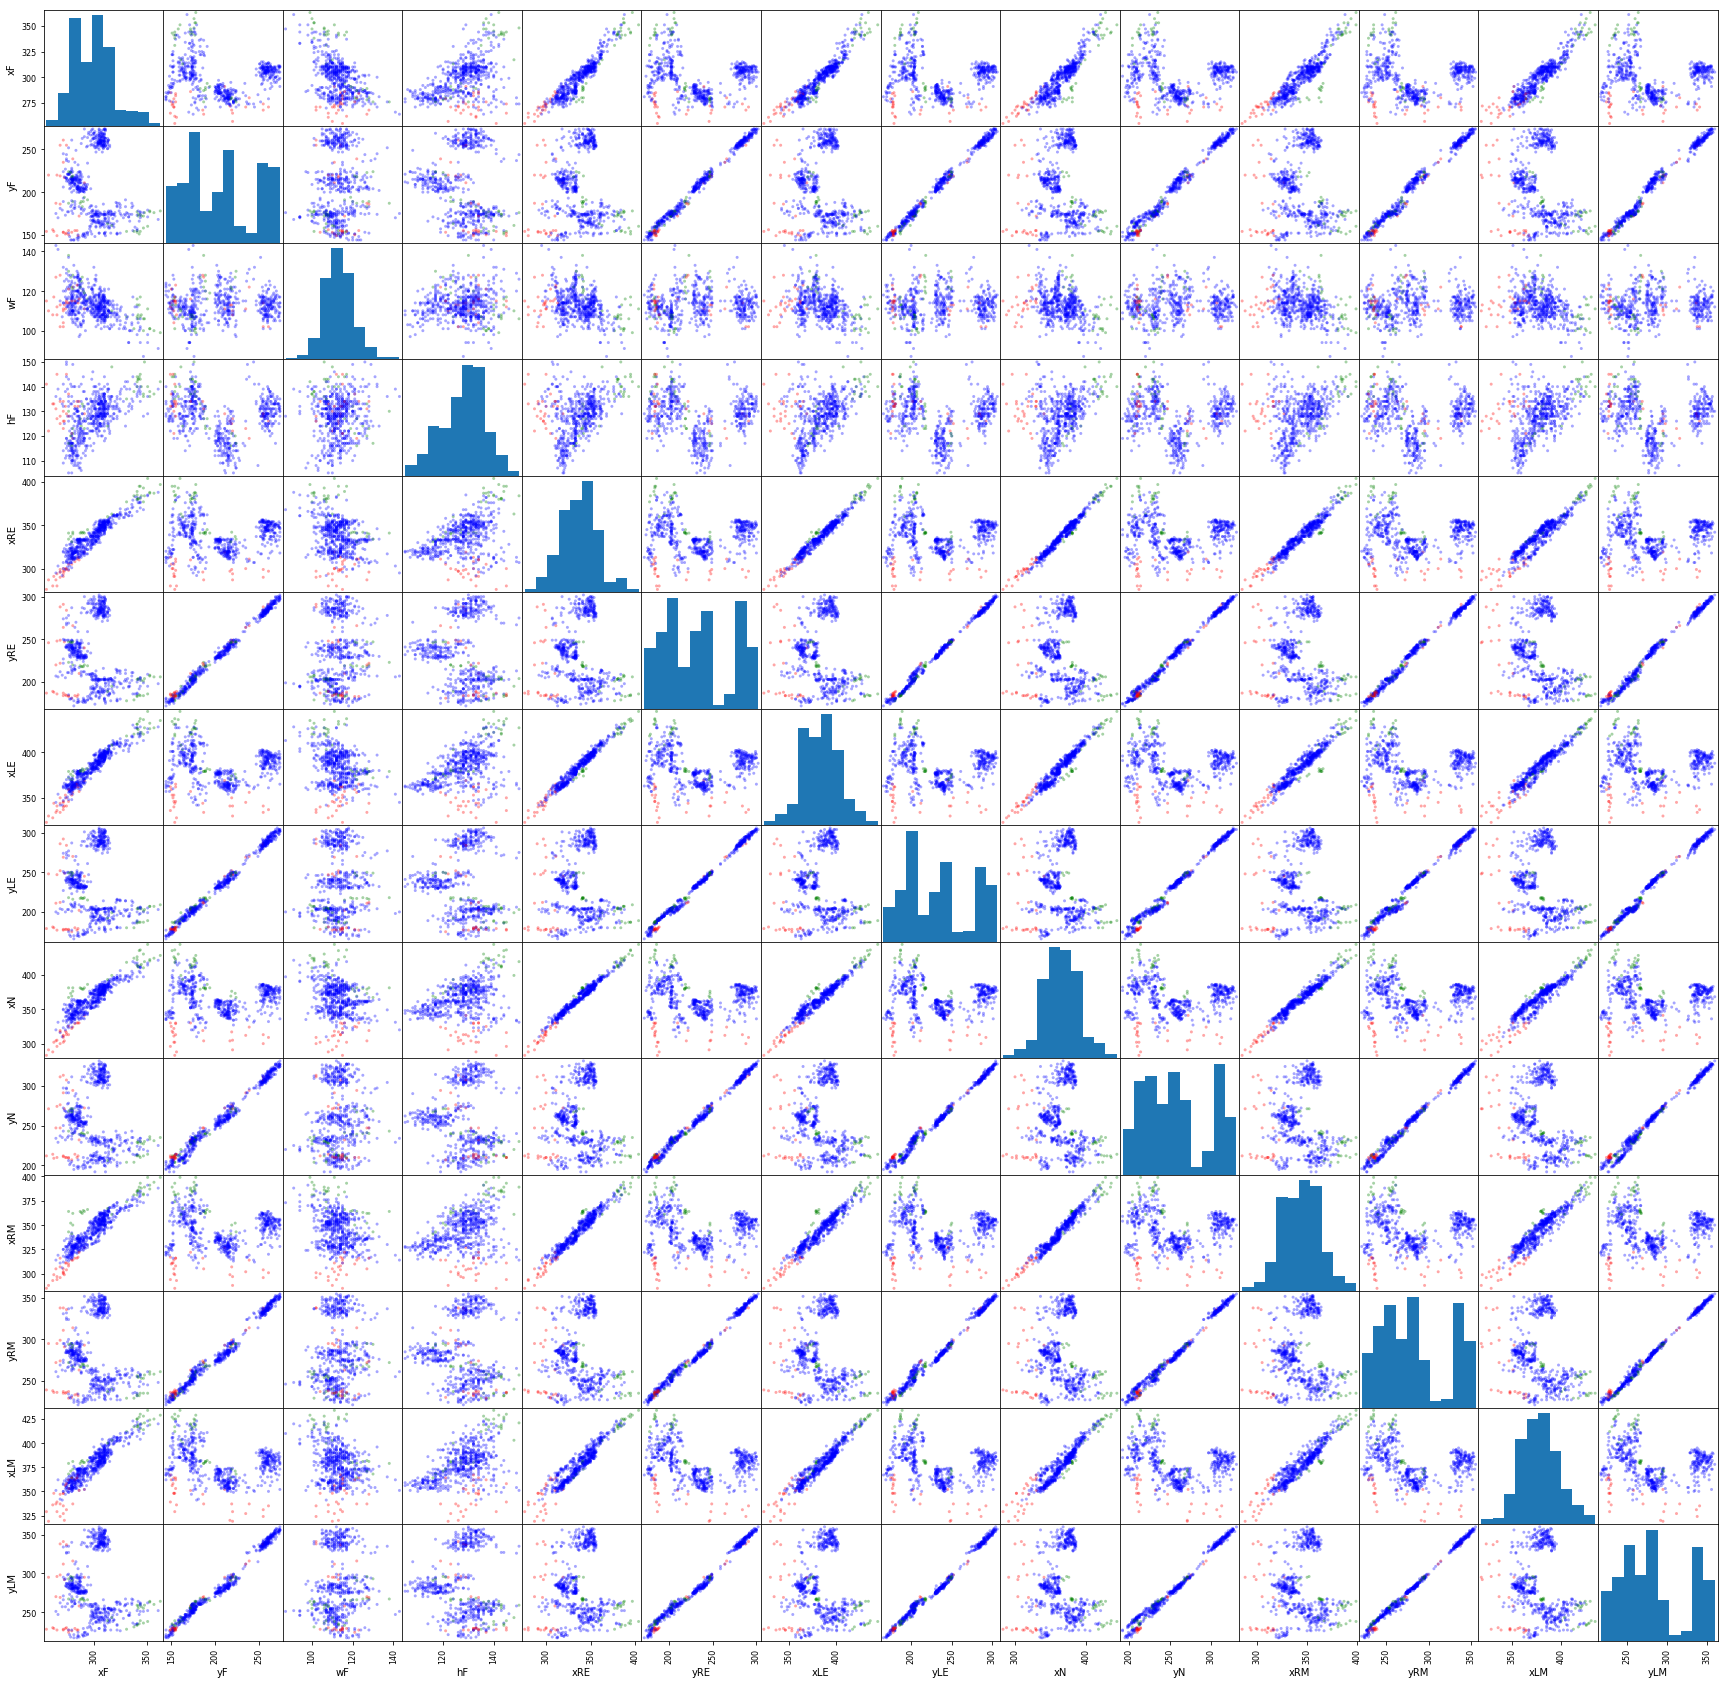

In [14]:
# Scatter matrix plot showing all plots between attributes

feature_cols = list(dataset.columns[4:])
color_map = {1:'red', 2:'blue', 3:'green'}
color_mapper = dataset['label'].map(lambda x: color_map.get(x))
scatter_matrix = pd.plotting.scatter_matrix(dataset[feature_cols], c = color_mapper, alpha = 0.35, figsize = (30,30));
plt.show()

# In the scatter matrix below, we can quickly identify patterns between attributes 
# and decide which attributes to investigate.

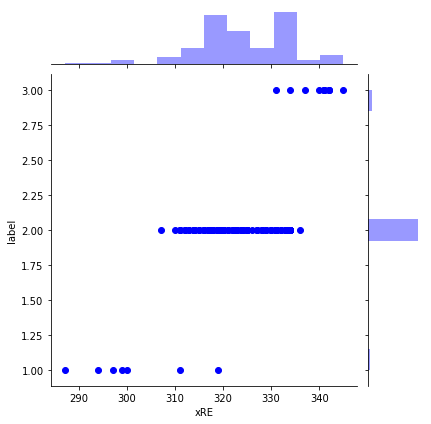

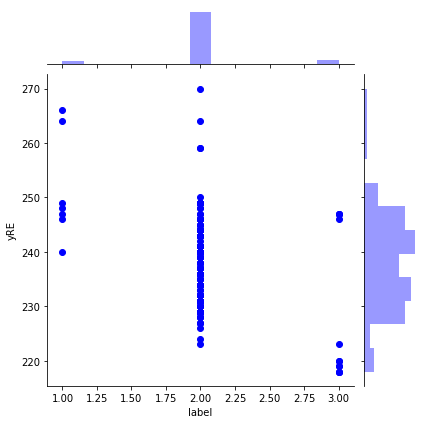

In [15]:
# As the class is the 'label' value, tracking a users gaze between frontal, left and right, we should be 
# able to plot the x,y values for the left and right eyes against the label and notice a pattern.  We
# will do this for each subject.

# Plot of right eye x-coordinate vs label.  Again as left eye mimicks the rigtht eye, we will assume 
# the right eye movements is a good representation for both.

# Subject 1:
sea.jointplot(x = "xRE", y = "label", data = X_subject_1, color = "blue")
sea.jointplot(x = "label", y = "yRE", data = X_subject_1, color = "blue")

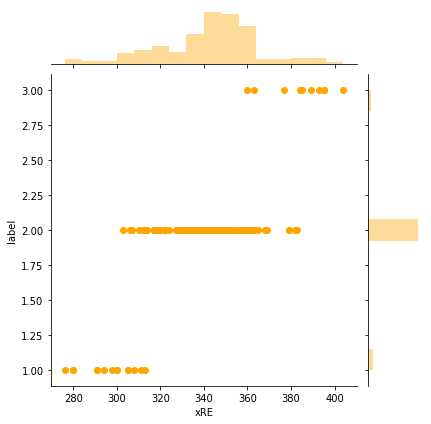

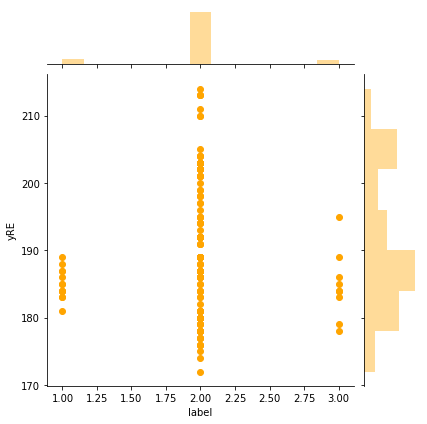

In [16]:
# Subject 2:
sea.jointplot(x = "xRE", y = "label", data = X_subject_2, color = "orange")
sea.jointplot(x = "label", y = "yRE", data = X_subject_2, color = "orange")

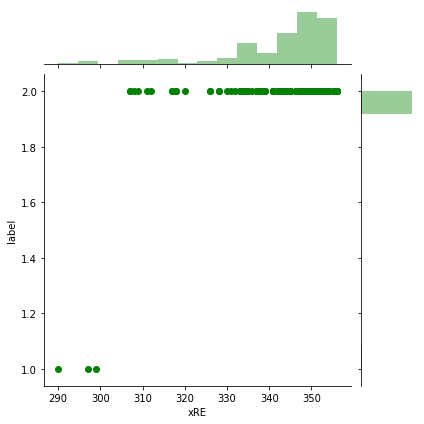

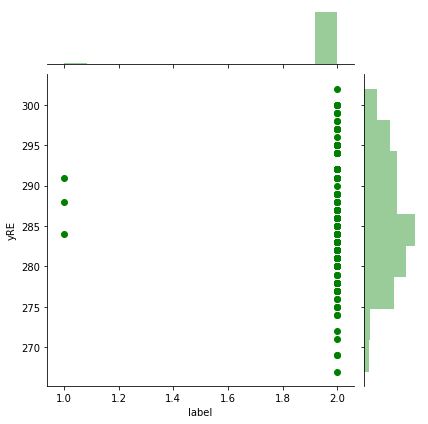

In [17]:
# Subject 3:
sea.jointplot(x = "xRE", y = "label", data = X_subject_3, color = "green")
sea.jointplot(x = "label", y = "yRE", data = X_subject_3, color = "green")

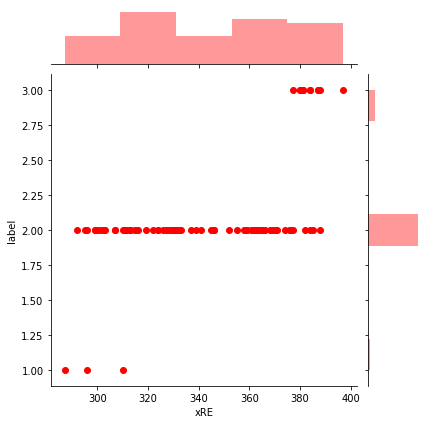

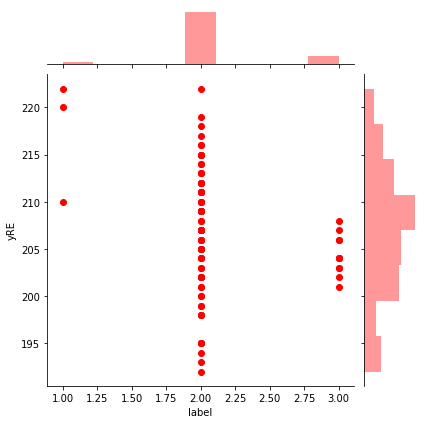

In [18]:
# Subject 4:
sea.jointplot(x = "xRE", y = "label", data = X_subject_4, color = "red")
sea.jointplot(x = "label", y = "yRE", data = X_subject_4, color = "red")

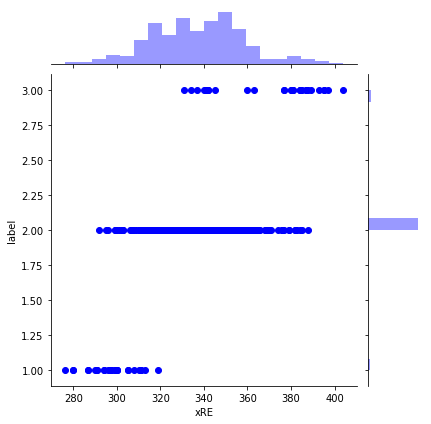

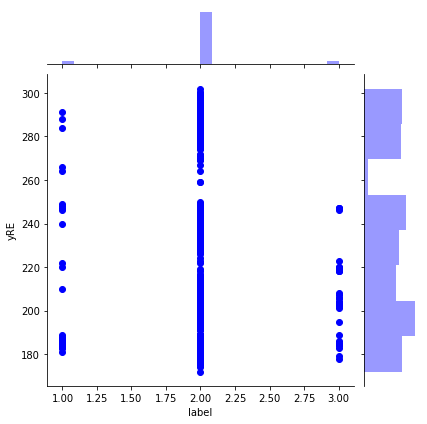

In [19]:
# Can quickly see that subject 3 never looked to the right, as indicated by 0 counts of label = 3.
# As well subject 3 hardly looked anywhere but forward.

# Lets view them all in a single jointplot to see the avg distribution

# All subjects:
sea.jointplot(x = "xRE", y = "label", data = dataset, color = "blue")
sea.jointplot(x = "label", y = "yRE", data = dataset, color = "blue")

In [20]:
# There is a sensible pattern, however the overlap of the eye movements over various label values  is curious.  The 
# label refers to the direction of the drivers face: 1 = left, 2 = front
# 3 = right.  However we plotted the eye direction, so a driver could have
# been looking to the right, with their eyes shifted to the left, and
# vice versa.

# K - MEANS CLUSTERING & HIERARCHICAL


404
276
302
172
{1: [303, 277], 2: [293, 240], 3: [319, 248], 4: [356, 261]}


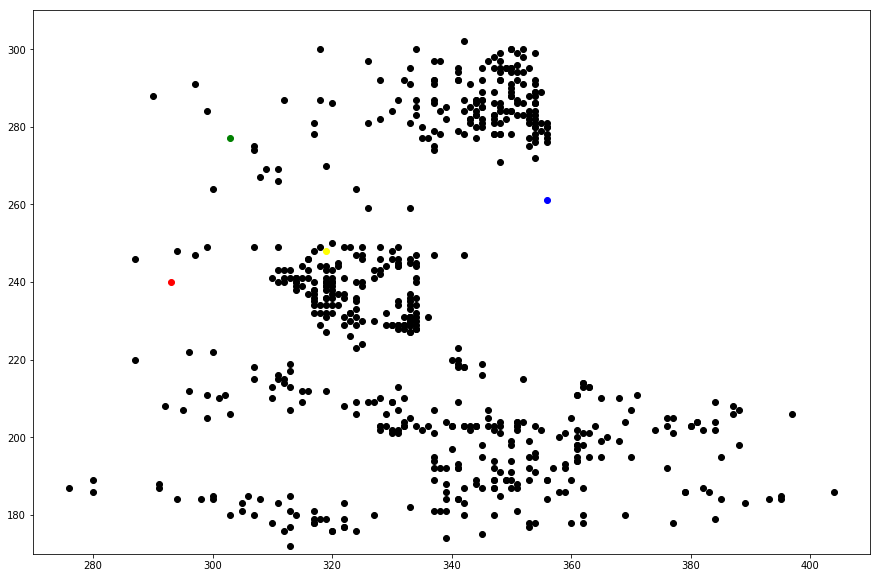

In [21]:
# Let's see how clustering performs for a couple attributes.  Let's see if we can identify the various subjects
# based on the eye movements.

# Initialize

# try k = 4 (subjects)
# find max & min of xRE and yRE
df = dataset.copy()

print(df.xRE.max())
print(df.xRE.min())
print(df.yRE.max())
print(df.yRE.min())
np.random.seed(200)
k = 4
centroids = {
    i+1: [np.random.randint(277, 403), np.random.randint(172, 301)]
    for i in range(k)
}
print(centroids)
plt.figure(figsize = (15,10))
plt.scatter(x = df.xRE, y = df.yRE, color = 'black')
color_map = {1: 'green', 2: 'red', 3: 'yellow', 4: 'blue'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(270, 410)
plt.ylim(170, 310)
plt.show()

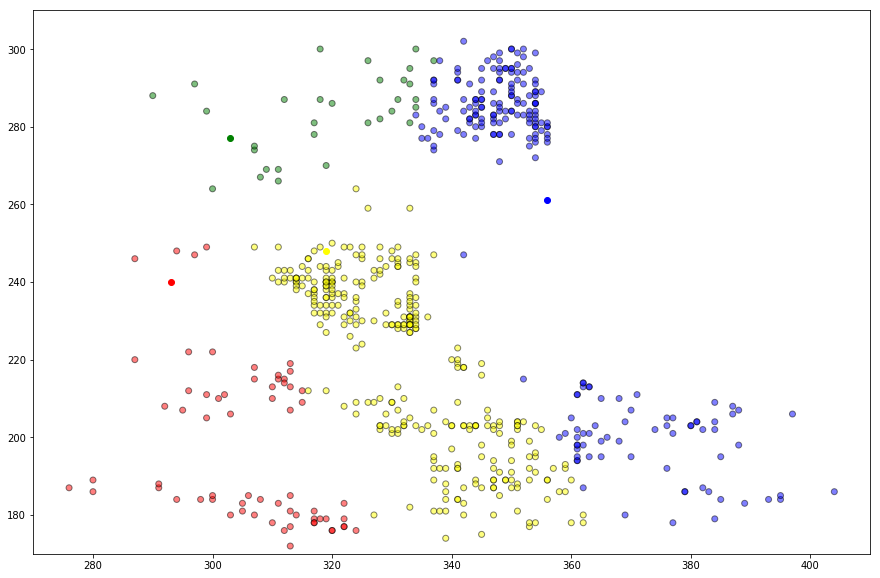

In [22]:
# Assignment

def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['xRE'] - centroids[i][0]) ** 2
                + (df['yRE'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: color_map[x])
    return df

df = assignment(df, centroids)
plt.figure(figsize = (15, 10))
plt.scatter(x = df.xRE, y = df.yRE, color = df.color, alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
    #ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc = color_map[i], ec = color_map[i])
plt.xlim(270, 410)
plt.ylim(170, 310)
plt.show()

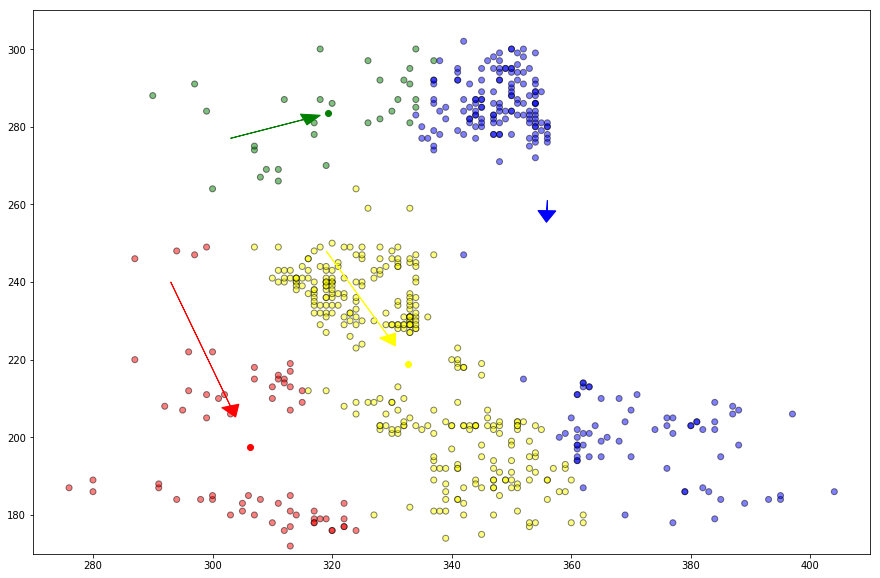

In [23]:
# Update

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['xRE'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['yRE'])
    return k

centroids = update(centroids)
    
plt.figure(figsize = (15, 10))
ax = plt.axes()
plt.scatter(x = df.xRE, y = df.yRE, color = df.color, alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(270, 410)
plt.ylim(170, 310)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width = 3, head_length = 3, fc = color_map[i], ec = color_map[i])
plt.show()

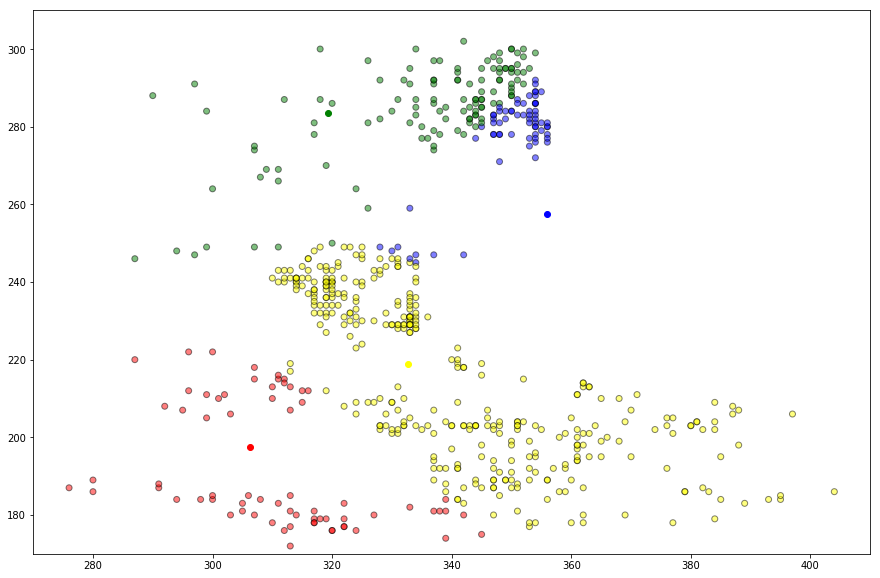

In [24]:
df = assignment(df, centroids)
fig = plt.figure(figsize = (15, 10))
plt.scatter(x = df.xRE, y = df.yRE, color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(270, 410)
plt.ylim(170, 310)
plt.show()

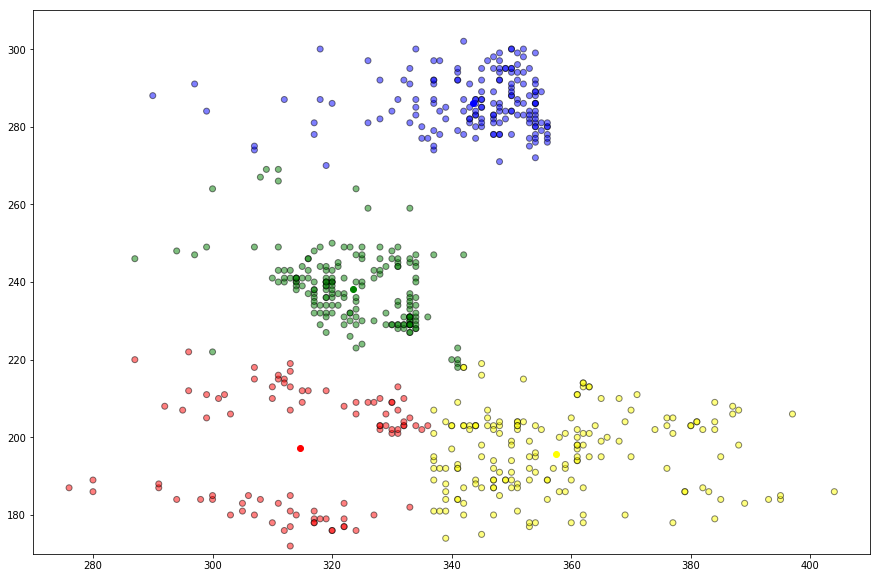

In [25]:
# Loop to continue updates until centroid shift is under a certain value
while True:
    closest_centroids = df['closest'].copy(deep = True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize = (15, 10))
plt.scatter(x = df.xRE, y = df.yRE, color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(270, 410)
plt.ylim(170, 310)
plt.show()

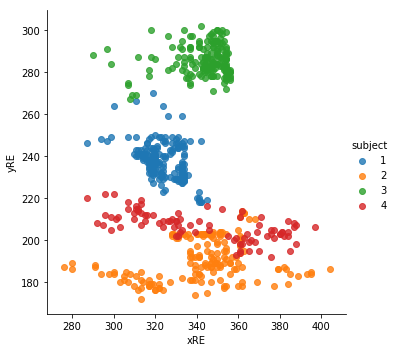

In [26]:
# Original plot.
sea.lmplot(x = 'xRE', y = 'yRE', hue = 'subject', data = dataset, fit_reg = False)

In [27]:
# Not bad, except subject 3 and 4's eye movements were seperated by clustering due to overlap in values.

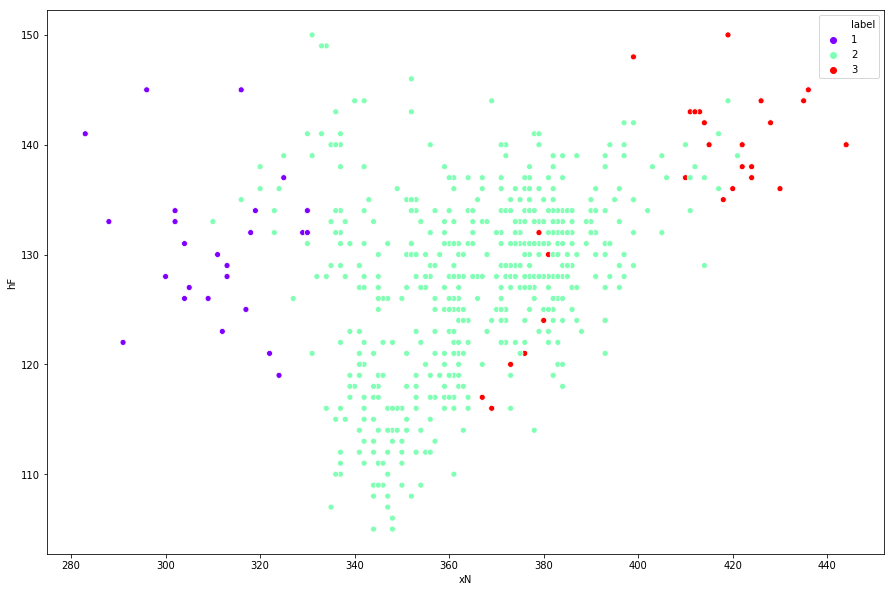

In [28]:
# Lets try to estimate the label value of a driver using some other attributes.

# Plot nose and a single measure of face position.
plt.figure(figsize = (15,10))
sea.scatterplot(x = 'xN',
                y = 'hF', 
                hue = 'label', 
                data = dataset,
                legend = 'full',
                palette = 'rainbow')

444
283
150
105
{1: [432, 115], 2: [292, 126], 3: [374, 144], 4: [433, 146]}


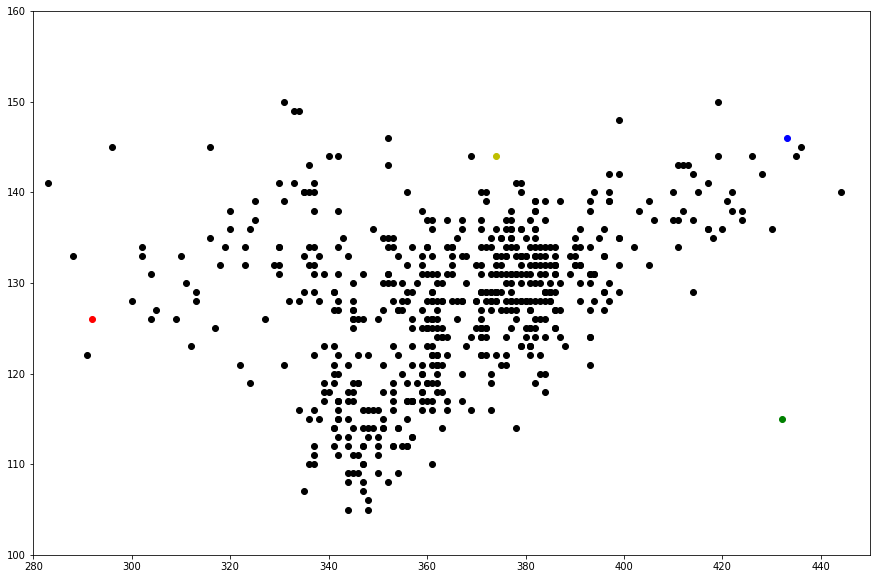

In [29]:
# Clustering with xN and hF could work.  Let's try clustering algorithm with k = 3 (3 different labels)
# The cluster alogithm below was originally completed with k = 3, however
# the result did not accurately represent the plot above. With k = 4,
# and combining the two central labels, the result is closer to the original
# plot above.  Perhaps the data would have been better represented with
# the frontal view split to front slight left, and front slight right.

# Initialize

# find max & min of xRE and yRE

df = dataset.copy()
print(df.xN.max())
print(df.xN.min())
print(df.hF.max())
print(df.hF.min())
np.random.seed(300)
k = 4
centroids = {
    i+1: [np.random.randint(283, 444), np.random.randint(105, 150)]
    for i in range(k)
}
print(centroids)
plt.figure(figsize = (15,10))
plt.scatter(x = df.xN, y = df.hF, color = 'black')
color_map = {1: 'g', 2: 'r', 3: 'y', 4: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(280, 450)
plt.ylim(100, 160)
plt.show()

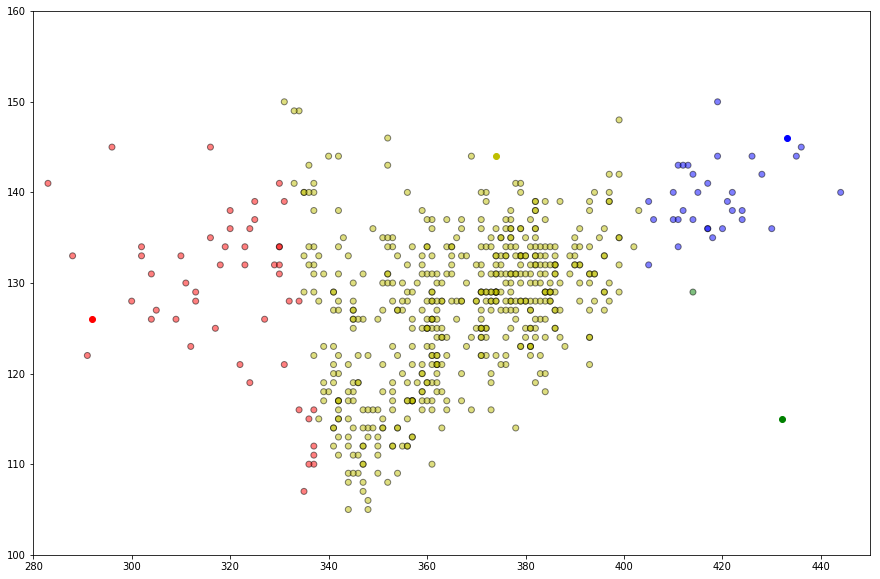

In [30]:
# Assignment

def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['xN'] - centroids[i][0]) ** 2
                + (df['hF'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis = 1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: color_map[x])
    return df

df = assignment(df, centroids)
plt.figure(figsize = (15, 10))
plt.scatter(x = df.xN, y = df.hF, color = df.color, alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
    #ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length = 3, fc = color_map[i], ec = color_map[i])
plt.xlim(280, 450)
plt.ylim(100, 160)
plt.show()

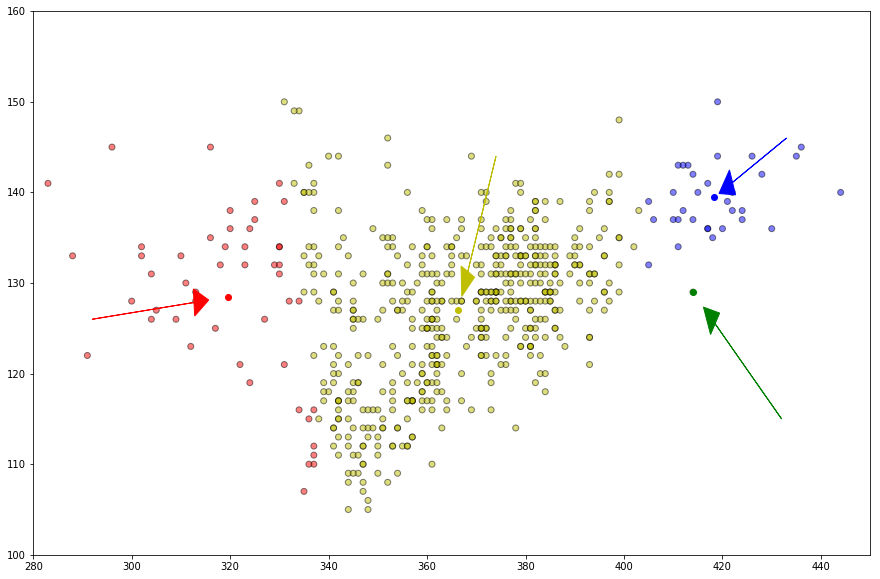

In [31]:
# Update

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['xN'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['hF'])
    return k

centroids = update(centroids)
    
plt.figure(figsize = (15, 10))
ax = plt.axes()
plt.scatter(x = df.xN, y = df.hF, color = df.color, alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(280, 450)
plt.ylim(100, 160)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width = 3, head_length = 3, fc = color_map[i], ec = color_map[i])
plt.show()

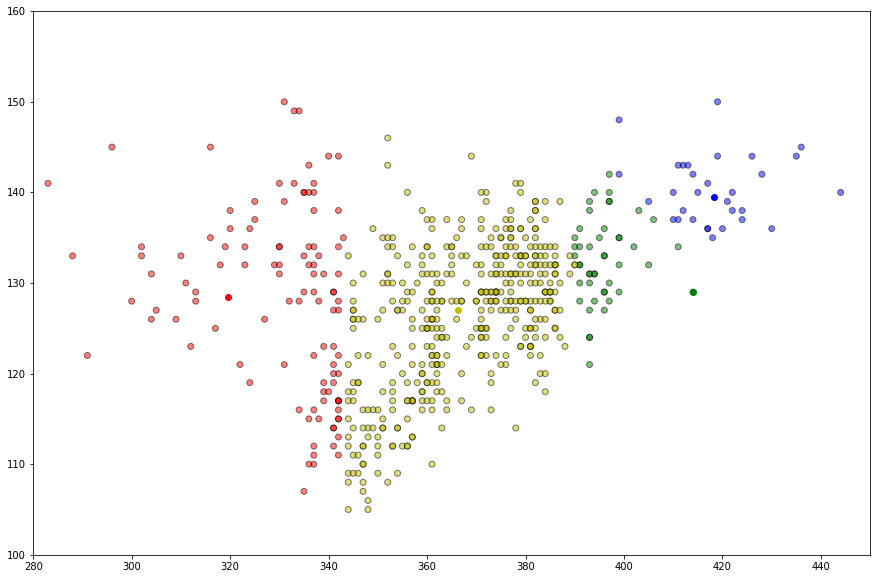

In [32]:
df = assignment(df, centroids)
fig = plt.figure(figsize = (15, 10))
plt.scatter(x = df.xN, y = df.hF, color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(280, 450)
plt.ylim(100, 160)
plt.show()

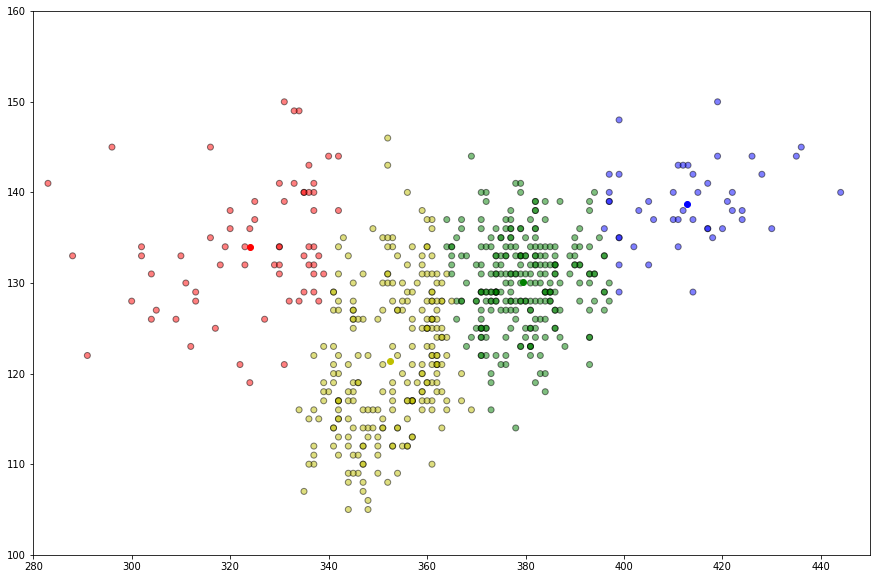

In [33]:
# At this point we are somewhat close to the original xN, hF, label plot above.
# Let's keep going.

# Loop to continue updates until centroid shift is under a certain value
while True:
    closest_centroids = df['closest'].copy(deep = True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize = (15, 10))
plt.scatter(x = df.xN, y = df.hF, color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = color_map[i])
plt.xlim(280, 450)
plt.ylim(100, 160)
plt.show()

In [34]:
# Again, combining yellow and green (central labels) into a single 
# label would provide an estimate for class not too far from the original
# plot, seen below. There is some degree of error however, but as the bulk
# of measurements are centrally located and captured within yellow and green,
# the degree of error is minimized compared to data that is more equally distributed.

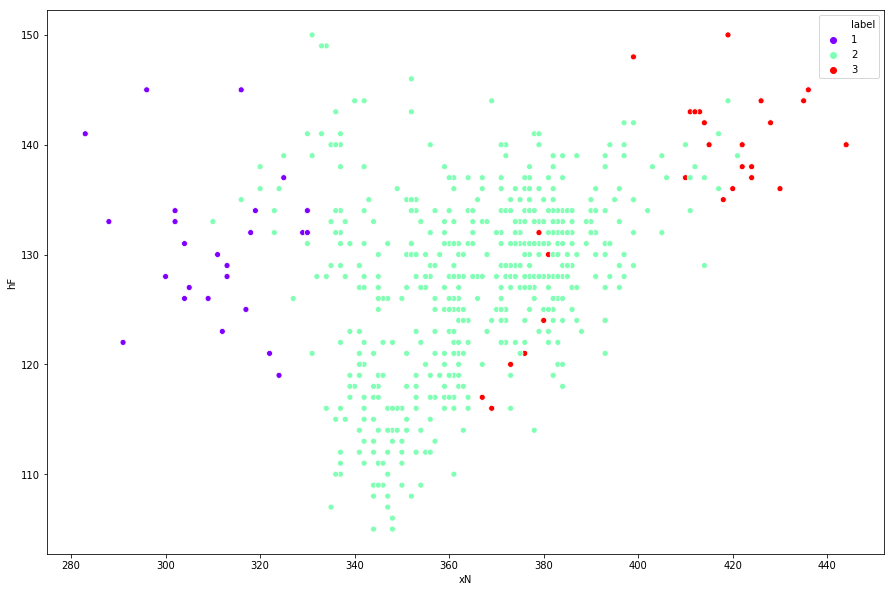

In [35]:
# Original plot
plt.figure(figsize = (15,10))
sea.scatterplot(x = 'xN',
                y = 'hF', 
                hue = 'label', 
                data = dataset,
                legend = 'full',
                palette = 'rainbow')
               

In [36]:
# Apply Heirarchical Clustering

# Let's try various heirachical clustering methods on the attributes

from scipy.cluster.hierarchy import linkage, dendrogram
dataset = pd.read_csv('drivPoints.txt', index_col = 0)
df_hier = dataset.copy()
df_hier_class = list(df_hier.pop('label'))
numbers = dataset.values
numbers

array([[  1,   1,   2, ..., 278, 361, 278],
       [  1,   2,   2, ..., 281, 361, 281],
       [  1,   3,   2, ..., 282, 362, 282],
       ...,
       [  4,  88,   1, ..., 272, 337, 270],
       [  4,  89,   2, ..., 261, 351, 251],
       [  4,  90,   2, ..., 255, 362, 247]])

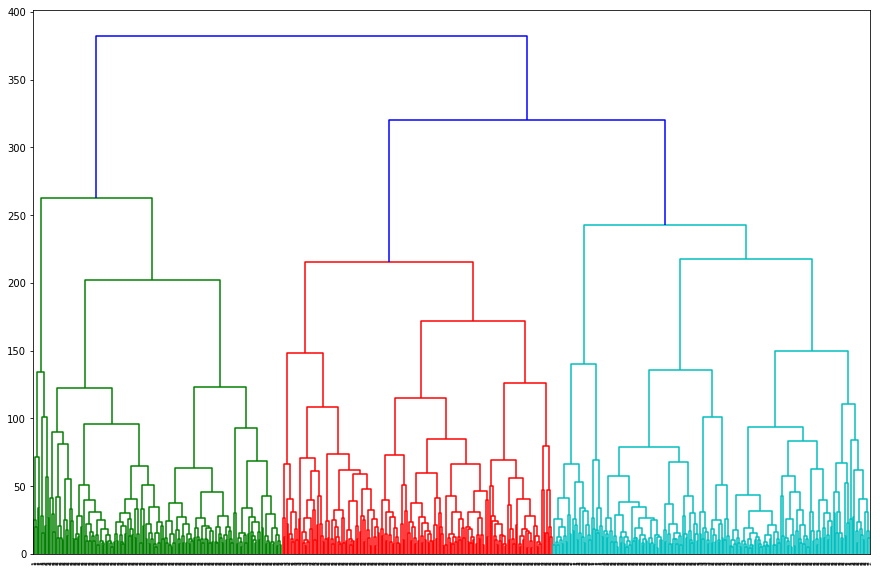

In [37]:
mergings = linkage(numbers, method  = 'complete')
plt.figure(figsize = (15,10))
dendrogram(mergings,
           labels = df_hier_class,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In [38]:
# Complete: Quite orderly with 3 clusters.

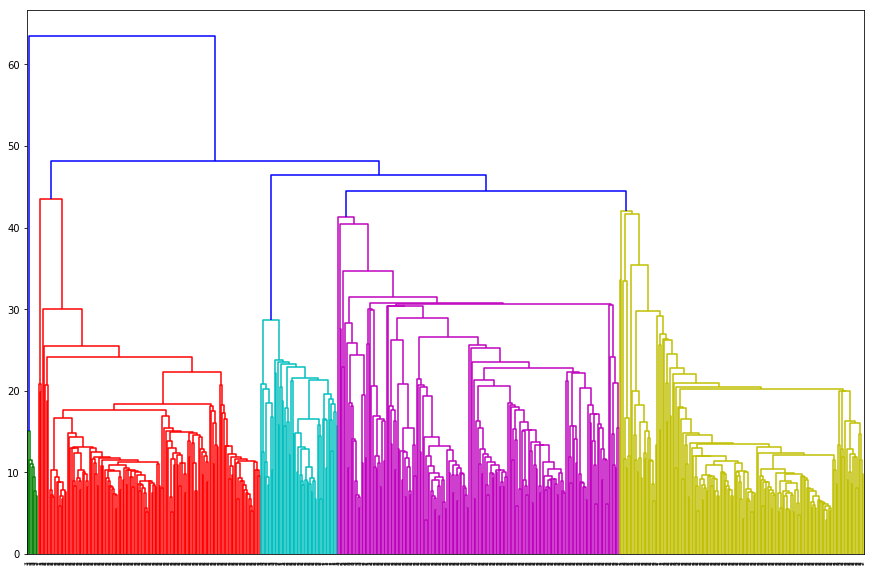

In [39]:
mergings = linkage(numbers, method  = 'single')
plt.figure(figsize = (15,10))
dendrogram(mergings,
           labels = df_hier_class,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In [40]:
# Single: If you look closely, theres 5 clusters.  Not too orderly or
# distributed

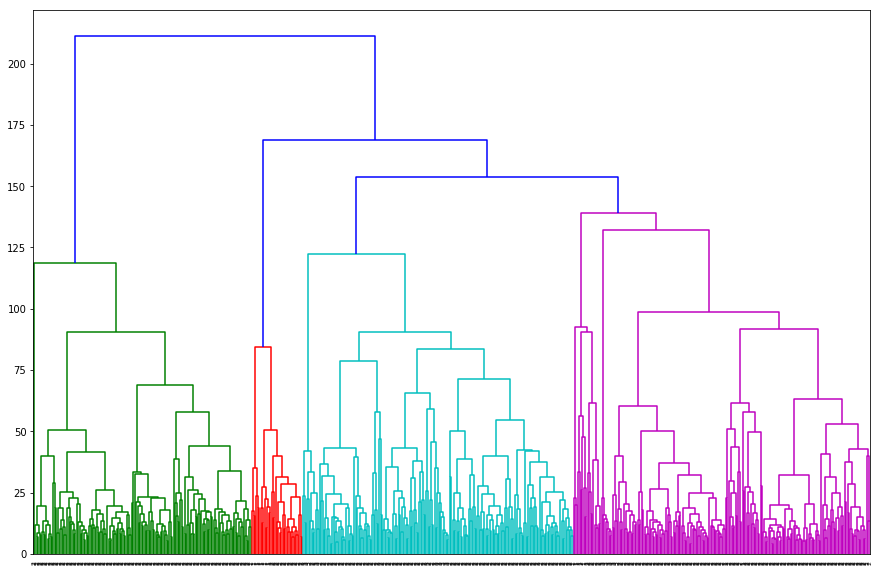

In [41]:
mergings = linkage(numbers, method  = 'average')
plt.figure(figsize = (15,10))
dendrogram(mergings,
           labels = df_hier_class,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In [42]:
# Average: Somewhat orderly.  4 clusters.  
# Complete still the most orderly.

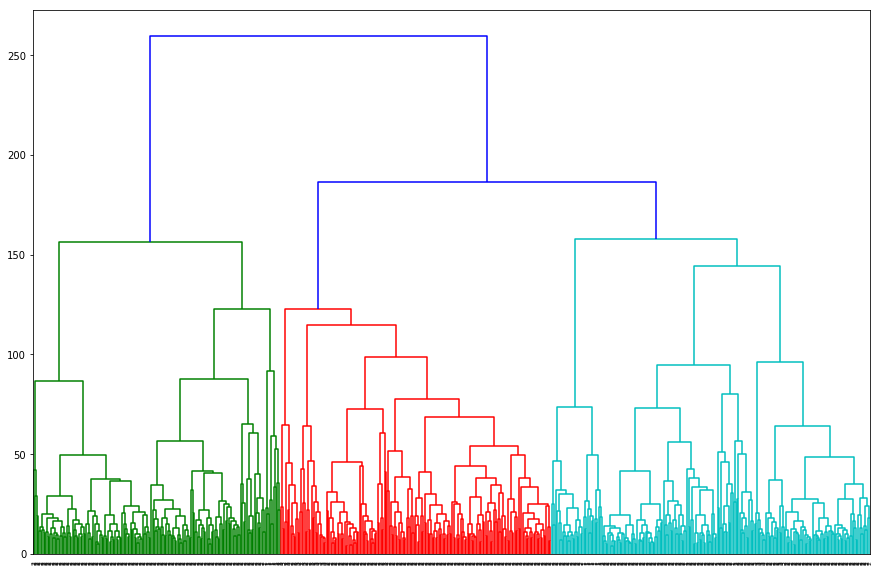

In [43]:
mergings = linkage(numbers, method  = 'weighted')
plt.figure(figsize = (15,10))
dendrogram(mergings,
           labels = df_hier_class,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In [44]:
# Weighted: Orderly, but as as much as complete. 3 clusters.
# Good distribution.

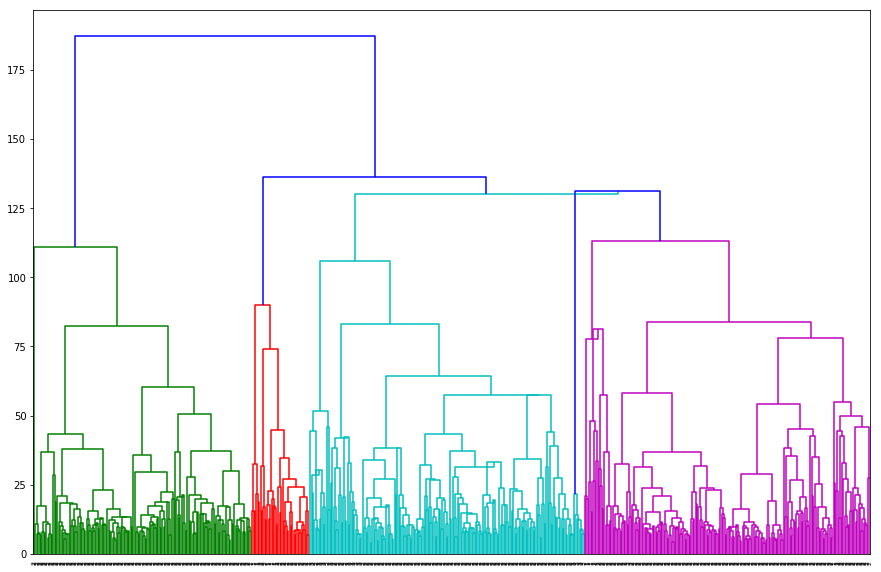

In [45]:
mergings = linkage(numbers, method  = 'centroid')
plt.figure(figsize = (15,10))
dendrogram(mergings,
           labels = df_hier_class,
           leaf_rotation = 90,
           leaf_font_size = 6,
)
plt.show()

In [46]:
# Centroid: Notice clustering returns with 4 clusters, which is what
# we found worked best from the k-means clustering. However, it is not 
# as orderly as complete.

# From the dendrograms it appears that complete returns the best result,
# while maintaining clusters at k = 3.

# Recursive Feature Selection and PCA

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
%matplotlib inline

In [48]:
dataset.head()

subject  imgNum  label  ang   xF   yF   wF   hF  xRE  \
fileName                                                                        
20130529_01_Driv_001_f         1       1      2    0  292  209  100  112  323   
20130529_01_Driv_002_f         1       2      2    0  286  200  109  128  324   
20130529_01_Driv_003_f         1       3      2    0  290  204  105  121  325   
20130529_01_Driv_004_f         1       4      2    0  287  202  112  118  325   
20130529_01_Driv_005_f         1       5      2    0  290  193  104  119  325   

                         yRE  xLE  yLE   xN   yN  xRM  yRM  xLM  yLM  
fileName                                                              
20130529_01_Driv_001_f   232  367  231  353  254  332  278  361  278  
20130529_01_Driv_002_f   235  366  235  353  258  333  281  361  281  
20130529_01_Driv_003_f   240  367  239  351  260  334  282  362  282  
20130529_01_Driv_004_f   230  369  230  353  253  335  274  362  275  
20130529_01_Driv_005_f   224  366  225  353  244  333  268  363  268

In [49]:
df = dataset.copy()
y = df['label'].values
label_store = df.pop('label')
subject_store = df.pop('subject')
df.pop('imgNum')
df.pop('ang')
X = df.values
print(df.head())
print("")
print(X)
print("")
print(y)

                          xF   yF   wF   hF  xRE  yRE  xLE  yLE   xN   yN  \
fileName                                                                    
20130529_01_Driv_001_f   292  209  100  112  323  232  367  231  353  254   
20130529_01_Driv_002_f   286  200  109  128  324  235  366  235  353  258   
20130529_01_Driv_003_f   290  204  105  121  325  240  367  239  351  260   
20130529_01_Driv_004_f   287  202  112  118  325  230  369  230  353  253   
20130529_01_Driv_005_f   290  193  104  119  325  224  366  225  353  244   

                         xRM  yRM  xLM  yLM  
fileName                                     
20130529_01_Driv_001_f   332  278  361  278  
20130529_01_Driv_002_f   333  281  361  281  
20130529_01_Driv_003_f   334  282  362  282  
20130529_01_Driv_004_f   335  274  362  275  
20130529_01_Driv_005_f   333  268  363  268  

[[292 209 100 ... 278 361 278]
 [286 200 109 ... 281 361 281]
 [290 204 105 ... 282 362 282]
 ...
 [264 187 127 ... 272 337 270]
 [264 17

In [50]:
model = LogisticRegression(multi_class = 'ovr',solver = 'lbfgs', max_iter = 10000)
rfecv = RFECV(estimator = model, step = 1, cv = StratifiedKFold(10), scoring = 'accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [51]:
print("Optimal number of features : " + str(rfecv.n_features_))

Optimal number of features : 7


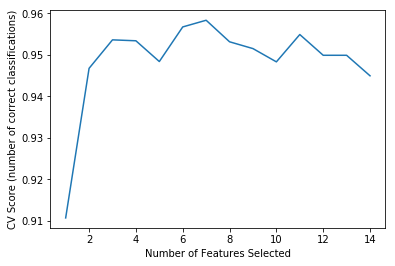

In [52]:
plt.xlabel("Number of Features Selected")
plt.ylabel("CV Score (number of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

In [53]:
rfecv.n_features_

7

In [54]:
rfecv.support_ 

array([False,  True, False, False,  True,  True,  True, False,  True,
        True, False,  True, False, False])

In [55]:
rfecv.ranking_

array([2, 1, 7, 8, 1, 1, 1, 6, 1, 1, 3, 1, 4, 5])

In [56]:
# The features selected are yF, xRE, xLE, xN, yN, yRM

In [57]:
# PCA

from sklearn import decomposition

print("Shape of Original Dataset is : " + str(X.shape))
X_red = df.values
pca = decomposition.PCA(n_components = 3)
pca.fit(X)
X_red = pca.transform(X_red)

Shape of Original Dataset is : (606, 14)


In [58]:
X_red

array([[ -5.02483462,  33.29206542, -15.55607068],
       [ -1.69954237,  34.00519782,  -0.44559128],
       [  5.09979862,  32.0693496 ,  -5.98350046],
       ...,
       [-31.95085066, 115.98117104,  17.35342064],
       [-65.46335867,  93.97339745,  18.32652384],
       [-75.89991244,  75.11178559,  17.6630584 ]])

In [59]:
print("Shape of New Dataset is : " + str(X_red.shape))

Shape of New Dataset is : (606, 3)


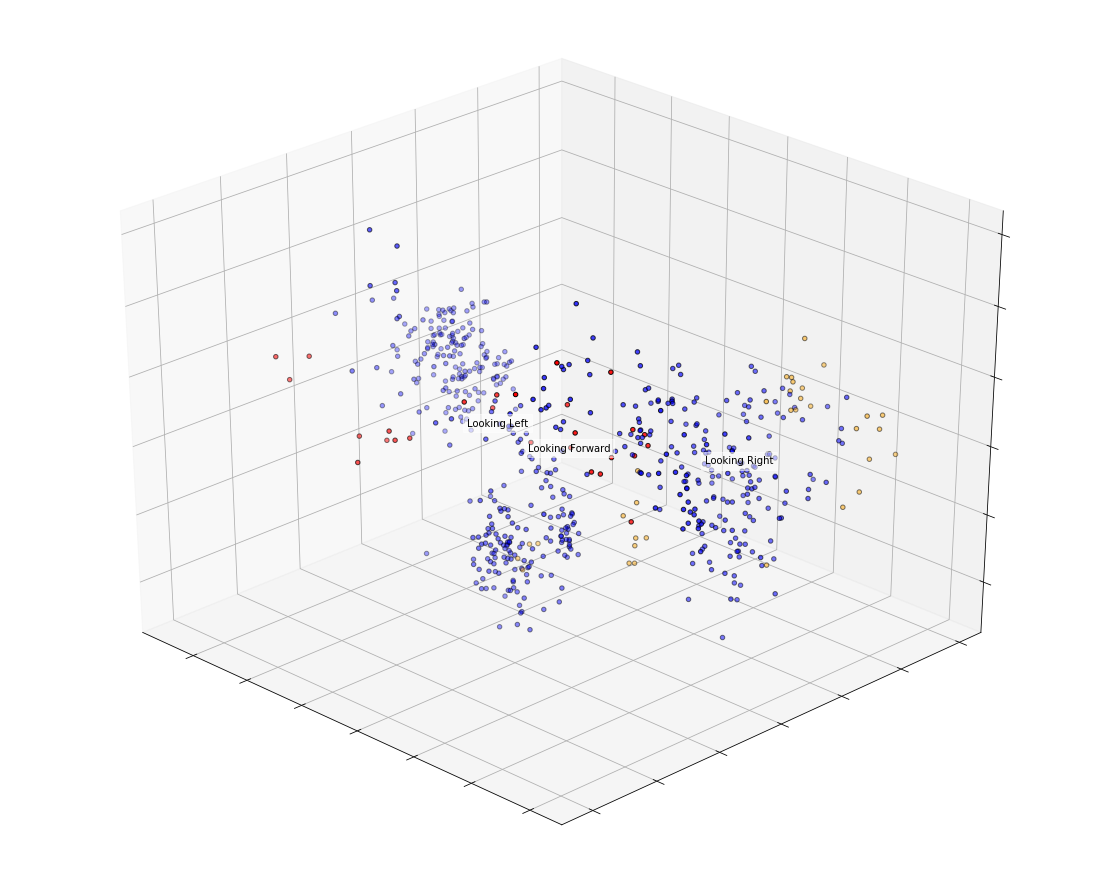

In [60]:
np.random.seed(5)

color_map = {1:'red', 2:'blue', 3:'orange'}
color_mapper = dataset['label'].map(lambda x: color_map.get(x))

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize = (15, 12))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 30, azim = 135)

for name, label in [('Looking Left', 1), ('Looking Forward', 2), ('Looking Right', 3)]:
    ax.text3D(X_red[y == label, 0].mean(),
              X_red[y == label, 1].mean() + 1.5,
              X_red[y == label, 2].mean(), name,
              horizontalalignment = 'center',
              bbox = dict(alpha = .5, edgecolor = 'w', facecolor = 'w'))

ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c = color_mapper, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

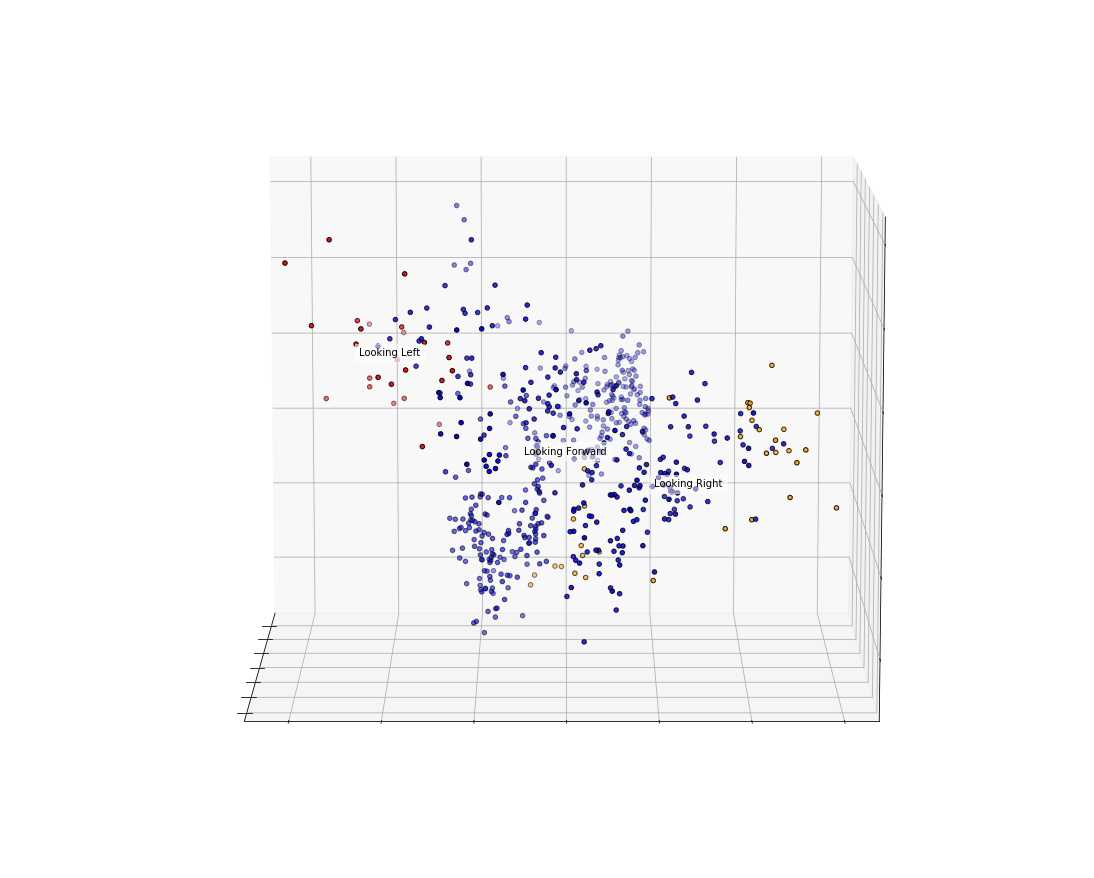

In [61]:
fig = plt.figure(1, figsize = (15, 12))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 10, azim = 180)

for name, label in [('Looking Left', 1), ('Looking Forward', 2), ('Looking Right', 3)]:
    ax.text3D(X_red[y == label, 0].mean(),
              X_red[y == label, 1].mean() + 1.5,
              X_red[y == label, 2].mean(), name,
              horizontalalignment = 'center',
              bbox = dict(alpha = .5, edgecolor = 'w', facecolor = 'w'))

ax.scatter(X_red[:, 0], X_red[:, 1], X_red[:, 2], c = color_mapper, edgecolor = 'k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [62]:
# We can see clear groupings after pca, with "looking forward" concentrated
# into the central region and "looking left" and "looking right" to the left and right respectively.
# Can see some minor "looking right" data points within the central region however.

In [63]:
X = df.values
pca_1 = PCA(n_components = 8)
pca_1.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
var_Data = pca_1.explained_variance_ratio_
var1_Data = np.cumsum(np.round(pca_1.explained_variance_ratio_, decimals = 4)*100)

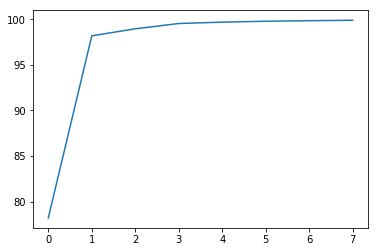

In [65]:
plt.plot(var1_Data)
plt.show()

# Train and Test / Cross Validation

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz 

dataset = pd.read_csv('drivPoints.txt', index_col = 0)
df = dataset.copy()
df.pop('imgNum')
df.pop('subject')
df.pop('ang')
y = df.pop('label').values
df.head()

xF   yF   wF   hF  xRE  yRE  xLE  yLE   xN   yN  \
fileName                                                                    
20130529_01_Driv_001_f   292  209  100  112  323  232  367  231  353  254   
20130529_01_Driv_002_f   286  200  109  128  324  235  366  235  353  258   
20130529_01_Driv_003_f   290  204  105  121  325  240  367  239  351  260   
20130529_01_Driv_004_f   287  202  112  118  325  230  369  230  353  253   
20130529_01_Driv_005_f   290  193  104  119  325  224  366  225  353  244   

                         xRM  yRM  xLM  yLM  
fileName                                     
20130529_01_Driv_001_f   332  278  361  278  
20130529_01_Driv_002_f   333  281  361  281  
20130529_01_Driv_003_f   334  282  362  282  
20130529_01_Driv_004_f   335  274  362  275  
20130529_01_Driv_005_f   333  268  363  268

In [68]:
X = df.values
print(X)
print("")
print(y)

[[292 209 100 ... 278 361 278]
 [286 200 109 ... 281 361 281]
 [290 204 105 ... 282 362 282]
 ...
 [264 187 127 ... 272 337 270]
 [264 175 143 ... 261 351 251]
 [266 170 141 ... 255 362 247]]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 2 2 2 2 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y, test_size = 0.5, random_state = 5)

# Decision Tree 

# GINI

Decision tree accuracy GINI (Original Data) is:  0.9108910891089109


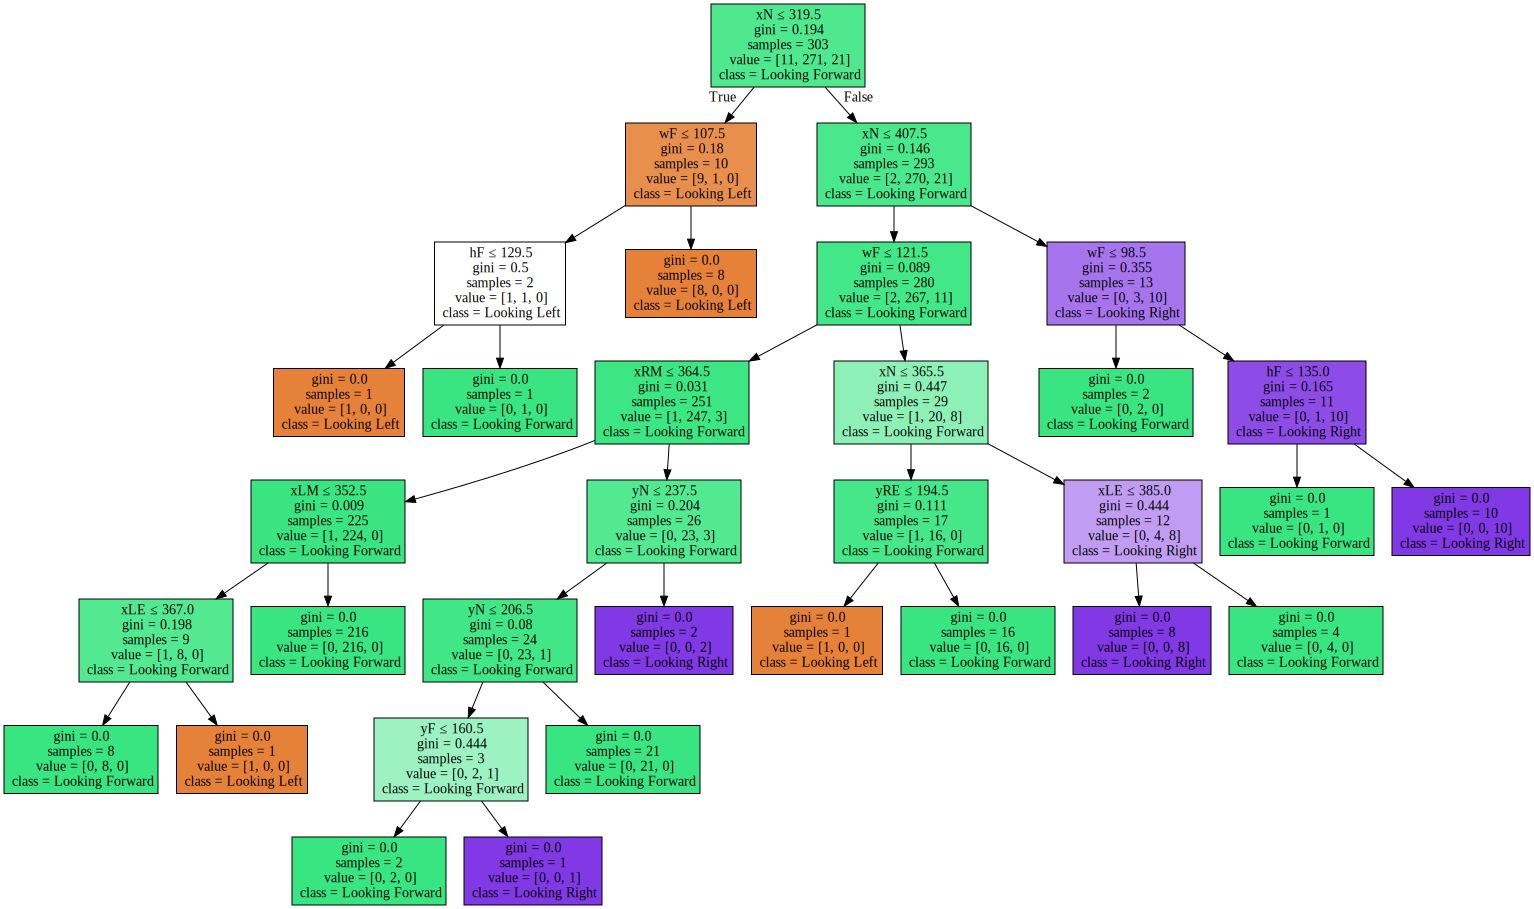

In [70]:
# Original Data

from sklearn import metrics

dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
print('Decision tree accuracy GINI (Original Data) is: ',dec_tree.score(X_test,y_test))
cls_names = ['Looking Left', 'Looking Forward', 'Looking Right']
graphData = tree.export_graphviz(dec_tree, out_file = None, 
                                feature_names = list(df.columns),  
                                class_names = cls_names,  
                                filled = True,  
                                special_characters = True)  
graphDraw = graphviz.Source(graphData)  
graphDraw

Decision tree accuracy GINI (Reduced Data) is:  0.9207920792079208


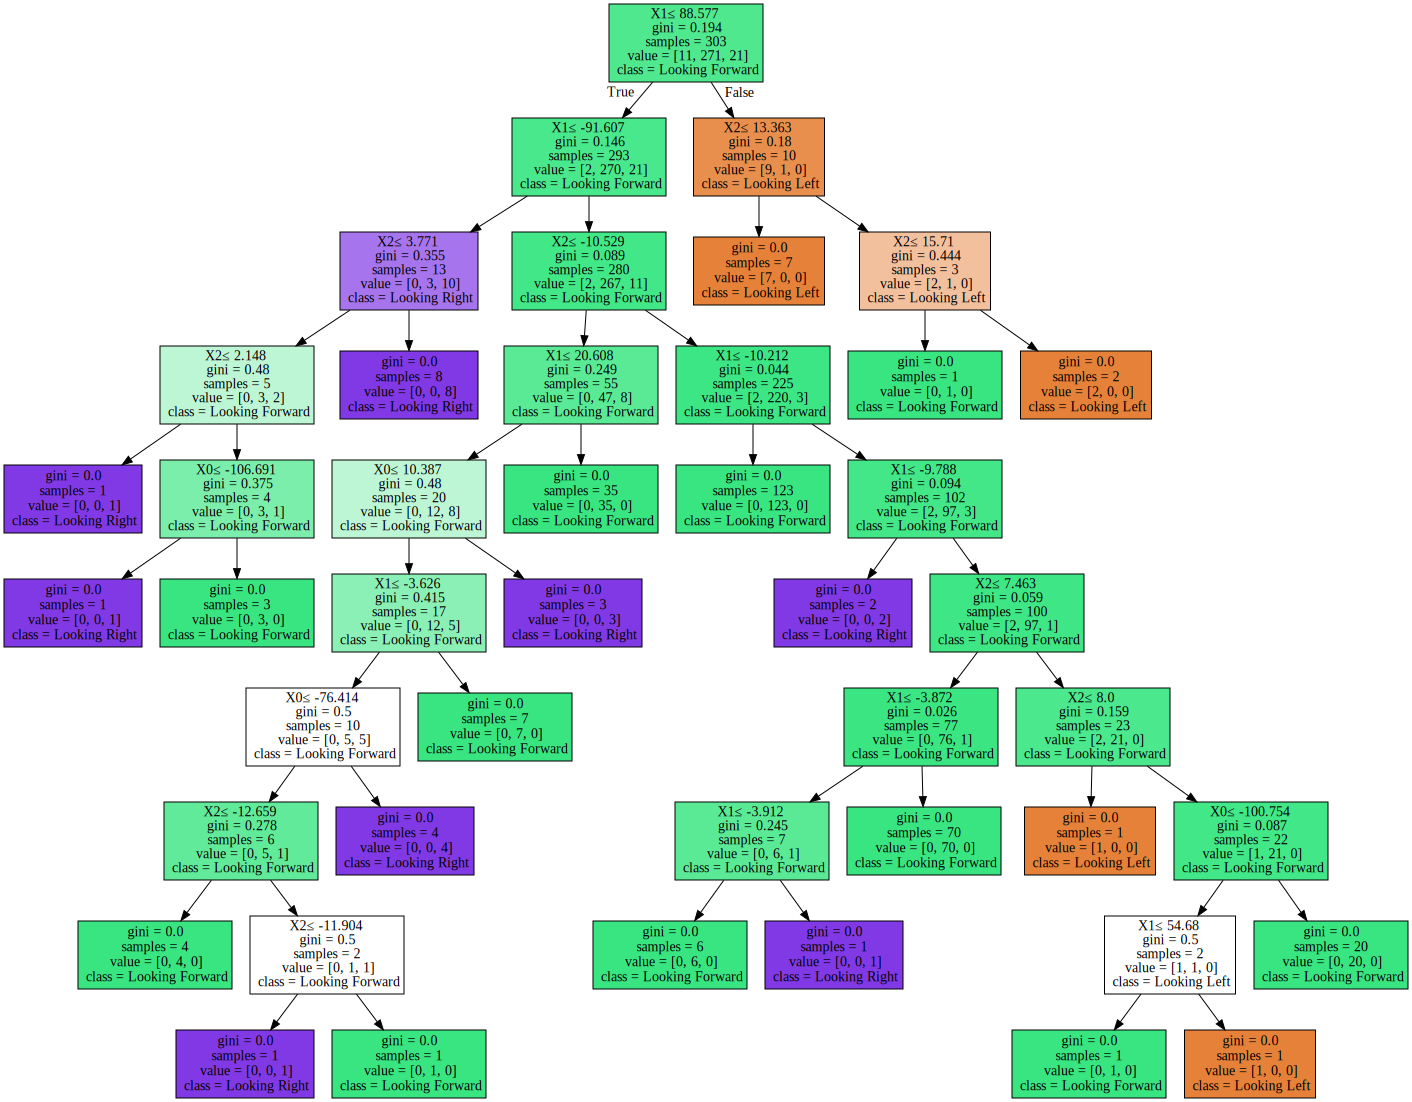

In [71]:
# PCA data

dec_tree_red = tree.DecisionTreeClassifier()
dec_tree_red.fit(X_train_red, y_train_red)
#prediction_red = dec_tree_red.predict(X_test_red)
print('Decision tree accuracy GINI (Reduced Data) is: ', dec_tree_red.score(X_test_red, y_test_red))
cls_names = ['Looking Left', 'Looking Forward', 'Looking Right']
graphData = tree.export_graphviz(dec_tree_red, out_file = None, 
                                class_names = cls_names,  
                                filled = True,  
                                special_characters = True)  
graphDraw = graphviz.Source(graphData)  
graphDraw

In [72]:
# evalute each decision tree

from sklearn.metrics import classification_report,confusion_matrix

predictions = dec_tree.predict(X_test)
predictions_red = dec_tree_red.predict(X_test_red)

print(classification_report(y_test, predictions))
print("")
print(classification_report(y_test_red, predictions_red))

              precision    recall  f1-score   support

           1       0.56      0.56      0.56        16
           2       0.96      0.94      0.95       275
           3       0.47      0.67      0.55        12

   micro avg       0.91      0.91      0.91       303
   macro avg       0.66      0.72      0.69       303
weighted avg       0.92      0.91      0.91       303


              precision    recall  f1-score   support

           1       0.57      0.81      0.67        16
           2       0.98      0.93      0.96       275
           3       0.53      0.75      0.62        12

   micro avg       0.92      0.92      0.92       303
   macro avg       0.69      0.83      0.75       303
weighted avg       0.94      0.92      0.93       303



In [73]:
print('Decision tree GINI accuracy (Original Data) is: ', metrics.accuracy_score(y_test, predictions))
print("")
print('Decision tree GINI accuracy (Reduced Data) is: ', metrics.accuracy_score(y_test_red, predictions_red))

Decision tree GINI accuracy (Original Data) is:  0.9108910891089109

Decision tree GINI accuracy (Reduced Data) is:  0.9207920792079208


# Entropy 

In [74]:
dec_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
dec_tree.fit(X_train,y_train)

dec_tree_red = tree.DecisionTreeClassifier(criterion = 'entropy')
dec_tree_red.fit(X_train_red,y_train_red)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [75]:
predictions = dec_tree.predict(X_test)
predictions_red = dec_tree_red.predict(X_test_red)

In [76]:
print(confusion_matrix(y_test, predictions))
print("")
print(confusion_matrix(y_test_red, predictions_red))

[[ 11   5   0]
 [  4 263   8]
 [  0   2  10]]

[[ 12   4   0]
 [  1 265   9]
 [  0   3   9]]


In [77]:
featureNames = df.columns

In [78]:
featureNames

Index(['xF', 'yF', 'wF', 'hF', 'xRE', 'yRE', 'xLE', 'yLE', 'xN', 'yN', 'xRM',
       'yRM', 'xLM', 'yLM'],
      dtype='object')

In [79]:
target_names = ['1', '2' ,'3']
target_names 

['1', '2', '3']

Decision tree Entropy accuracy (Original Data) is:  0.9372937293729373


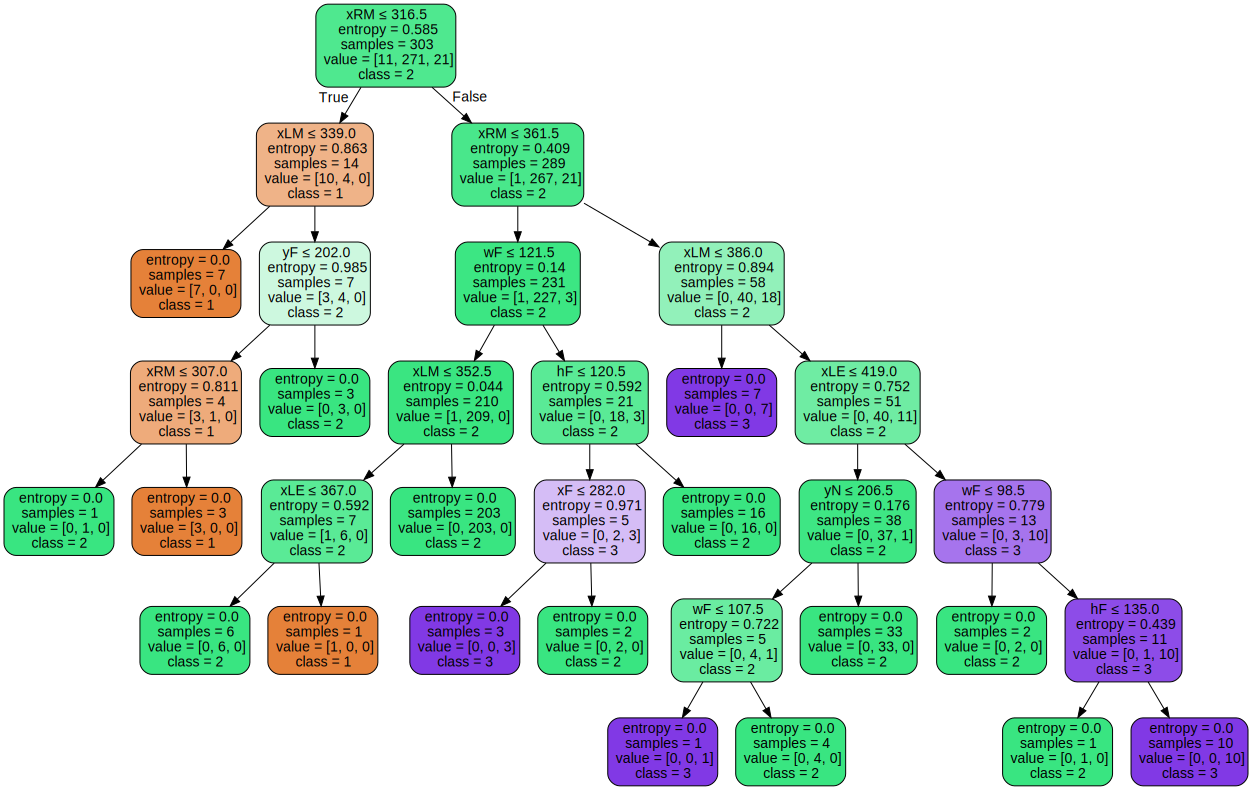

In [80]:
# Original Data

print('Decision tree Entropy accuracy (Original Data) is: ', dec_tree.score(X_test, y_test))

dot_data = tree.export_graphviz(dec_tree, out_file = None, 
                       feature_names = featureNames,  
                       class_names = target_names,  
                       filled = True, rounded = True,  
                       special_characters = True)  
graph = graphviz.Source(dot_data)  
graph 

Decision tree Entropy accuracy (Reduced Data) is:  0.9438943894389439


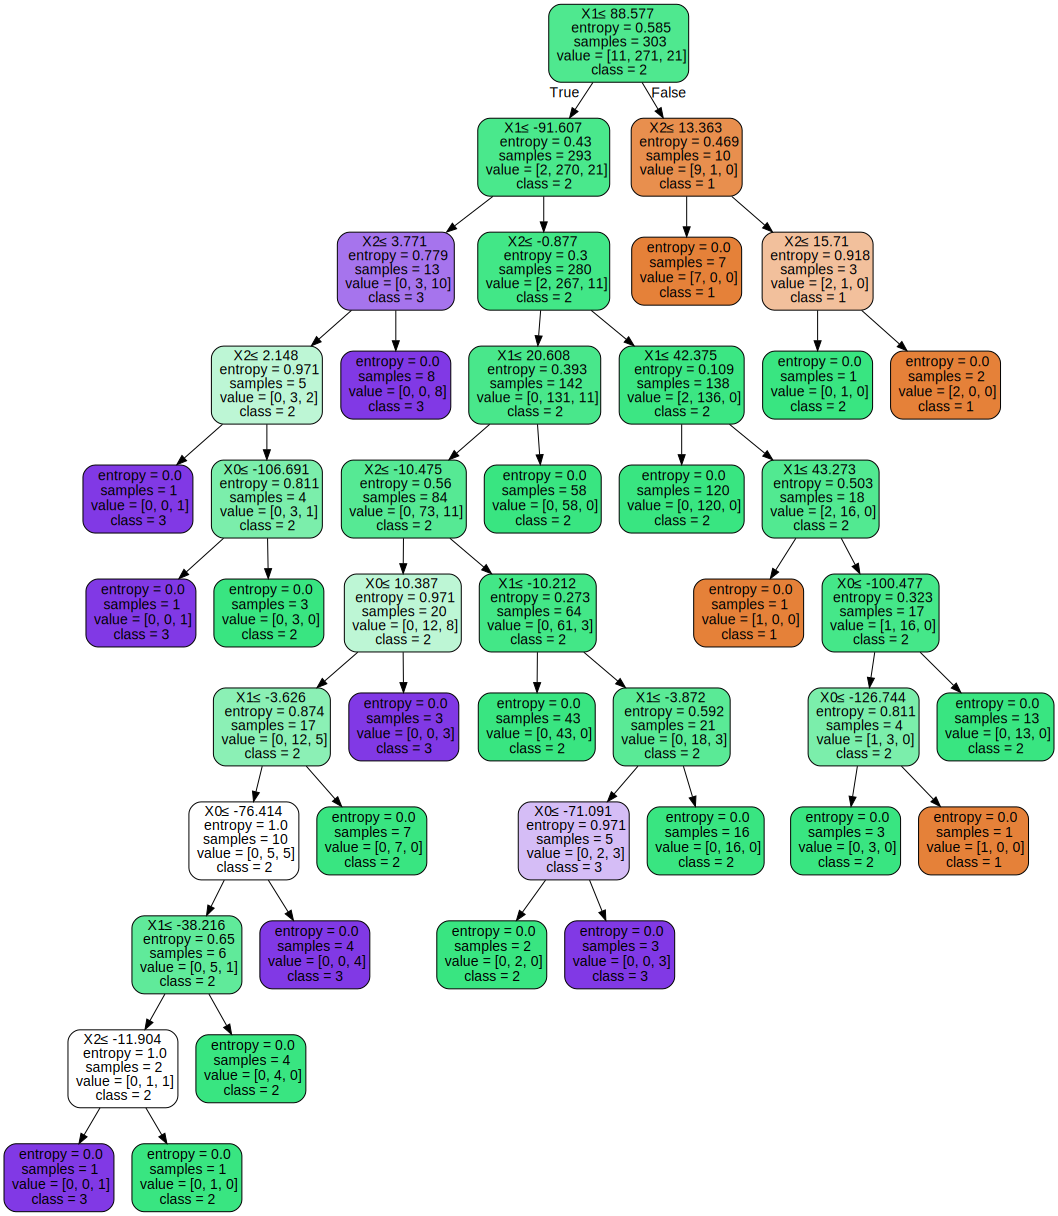

In [81]:
# Reduced Data
print('Decision tree Entropy accuracy (Reduced Data) is: ', dec_tree_red.score(X_test_red, y_test_red))

dot_data = tree.export_graphviz(dec_tree_red, out_file = None, 
                       #feature_names = featureNames,  
                       class_names = target_names,  
                       filled = True, rounded = True,  
                       special_characters = True)  
graph = graphviz.Source(dot_data)  
graph

In [82]:
# evalute each decision tree

predictions = dec_tree.predict(X_test)
predictions_red = dec_tree_red.predict(X_test_red)

print(classification_report(y_test, predictions))
print("")
print(classification_report(y_test_red, predictions_red))

              precision    recall  f1-score   support

           1       0.73      0.69      0.71        16
           2       0.97      0.96      0.97       275
           3       0.56      0.83      0.67        12

   micro avg       0.94      0.94      0.94       303
   macro avg       0.75      0.83      0.78       303
weighted avg       0.94      0.94      0.94       303


              precision    recall  f1-score   support

           1       0.92      0.75      0.83        16
           2       0.97      0.96      0.97       275
           3       0.50      0.75      0.60        12

   micro avg       0.94      0.94      0.94       303
   macro avg       0.80      0.82      0.80       303
weighted avg       0.95      0.94      0.95       303



In [83]:
print('Decision tree ENTROPY accuracy (Original Data) is: ', metrics.accuracy_score(y_test, predictions))
print("")
print('Decision tree ENTROPY accuracy (Reduced Data) is: ', metrics.accuracy_score(y_test_red, predictions_red))

Decision tree ENTROPY accuracy (Original Data) is:  0.9372937293729373

Decision tree ENTROPY accuracy (Reduced Data) is:  0.9438943894389439


# K - Nearest Neighbours

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [85]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn_red = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

knn_red.fit(X_train_red, y_train_red)
y_pred_red = knn_red.predict(X_test_red)
print(metrics.accuracy_score(y_test_red, y_pred_red))

0.9372937293729373
0.9306930693069307


In [86]:
scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy")
print(scores)
print(scores.mean())

scores_red = cross_val_score(knn_red, X_red, y, cv = 10, scoring = "accuracy")
print(scores_red)
print(scores_red.mean())

[0.90322581 0.9516129  0.96774194 0.96721311 0.95081967 0.62295082
 0.96666667 0.96610169 0.93220339 0.77966102]
0.900819702008025
[0.88709677 0.96774194 0.9516129  0.96721311 0.95081967 0.62295082
 0.93333333 0.96610169 0.91525424 0.79661017]
0.8958734654488852


In [87]:
k_range = list(range(1, 50))

k_scores = []
for item in k_range:
    knn = KNeighborsClassifier(n_neighbors = item)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = "accuracy")
    k_scores.append(scores.mean())
print(k_scores)

print(" ")

k_scores_red = []
for item in k_range:
    knn_red = KNeighborsClassifier(n_neighbors = item)
    scores_red = cross_val_score(knn_red, X_red, y, cv = 10, scoring = "accuracy")
    k_scores_red.append(scores_red.mean())
print(k_scores)

[0.8942578284887978, 0.8889862327348993, 0.9108798591006462, 0.9073824568951352, 0.900819702008025, 0.9041830914800111, 0.9007103675752225, 0.8893909150391238, 0.8861386675510223, 0.889584069051439, 0.8994757056171517, 0.8978363613548564, 0.9125895783476293, 0.9074228205564866, 0.9025576698425788, 0.9059475003510533, 0.9141442216625286, 0.9107553173372531, 0.9107553173372531, 0.9107553173372531, 0.9123946615995482, 0.9123946615995482, 0.9108108883291953, 0.9091715440669003, 0.8993354784931297, 0.9026141670177198, 0.9009748227554247, 0.9009748227554247, 0.9043646532638994, 0.9026697380096621, 0.9060595685181367, 0.9028364509854887, 0.9028364509854887, 0.9028364509854887, 0.9028364509854887, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936, 0.9011971067231936]
 
[0.8942578284887978

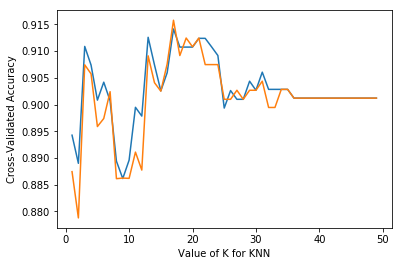

In [88]:
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

plt.plot(k_range, k_scores_red)

In [89]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn_red = KNeighborsClassifier(n_neighbors = 17)

knn.fit(X_train, y_train)
knn_red.fit(X_train_red, y_train_red)

prediction = knn.predict(X_test)
prediction_red = knn_red.predict(X_test_red)

print(cross_val_score(knn, X, y, cv = 10, scoring = "accuracy").mean())
print(cross_val_score(knn_red, X_red, y, cv = 10, scoring = "accuracy").mean())

print('With KNN (k = 17) accuracy is: ',knn.score(X_test, y_test)) # accuracy
print('With KNN (k = 17) accuracy is: ',knn_red.score(X_test_red, y_test_red)) # accuracy

# KNN = 17 is best, and as seen below the reduced data offers slightly higher accuracy @ 0.91578

0.9141442216625286
0.9157835659248237
With KNN (k = 17) accuracy is:  0.9174917491749175
With KNN (k = 17) accuracy is:  0.9174917491749175


In [90]:
# sample readout to check out of interest
print('True:', y_test[0:50])
print('Pred:', y_pred[0:50])

True: [1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 3 2 2 2 2]
Pred: [2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 2 2 2 2 2 3 2 3 3 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 3 2 2 2 2]


In [91]:
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion_red = metrics.confusion_matrix(y_test_red, y_pred_red)

print(confusion)
print("")
print(confusion_red)

[[  7   9   0]
 [  0 267   8]
 [  0   2  10]]

[[  6  10   0]
 [  0 266   9]
 [  0   2  10]]


In [92]:
print(classification_report(y_test, prediction))
print(" ")
print(classification_report(y_test_red, prediction_red))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.92      1.00      0.96       275
           3       1.00      0.25      0.40        12

   micro avg       0.92      0.92      0.92       303
   macro avg       0.64      0.42      0.45       303
weighted avg       0.87      0.92      0.88       303

 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.92      1.00      0.96       275
           3       0.80      0.33      0.47        12

   micro avg       0.92      0.92      0.92       303
   macro avg       0.57      0.44      0.48       303
weighted avg       0.87      0.92      0.89       303



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
print('KNN accuracy (Original Data) is: ', metrics.accuracy_score(y_test, prediction))
print("")
print('KNN accuracy (Reduced Data) is: ', metrics.accuracy_score(y_test_red, prediction_red))

KNN accuracy (Original Data) is:  0.9174917491749175

KNN accuracy (Reduced Data) is:  0.9174917491749175


# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 600)
rfc_red = RandomForestClassifier(n_estimators = 600)

rfc.fit(X_train, y_train)
rfc_red.fit(X_train_red, y_train_red)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
predictions = rfc.predict(X_test)
predictions_red = rfc_red.predict(X_test_red)

In [96]:
print(classification_report(y_test, predictions))
print("")
print(classification_report(y_test_red, predictions_red))

              precision    recall  f1-score   support

           1       0.90      0.56      0.69        16
           2       0.96      0.97      0.97       275
           3       0.60      0.75      0.67        12

   micro avg       0.94      0.94      0.94       303
   macro avg       0.82      0.76      0.78       303
weighted avg       0.95      0.94      0.94       303


              precision    recall  f1-score   support

           1       0.91      0.62      0.74        16
           2       0.95      0.98      0.97       275
           3       0.50      0.42      0.45        12

   micro avg       0.94      0.94      0.94       303
   macro avg       0.79      0.67      0.72       303
weighted avg       0.93      0.94      0.93       303



In [97]:
print('Random Forest accuracy (Original Data) is: ', metrics.accuracy_score(y_test, predictions))
print("")
print('Random Forest accuracy (Reduced Data) is: ', metrics.accuracy_score(y_test_red, predictions_red))

Random Forest accuracy (Original Data) is:  0.9438943894389439

Random Forest accuracy (Reduced Data) is:  0.9372937293729373


In [98]:
print(confusion_matrix(y_test, predictions))
print("")
print(confusion_matrix(y_test_red, predictions_red))

[[  9   7   0]
 [  1 268   6]
 [  0   3   9]]

[[ 10   6   0]
 [  1 269   5]
 [  0   7   5]]


In [99]:
# The performance for the original and reduced data are very close.  Likely enough to warrant use of the pca data
# to save computing time.

# SVM Classification

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_red = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train_red = scaler_red.fit_transform(X_train_red)

X_test = scaler.transform(X_test)
X_test_red = scaler_red.transform(X_test_red)

classifier = SVC(kernel = 'linear', random_state = 5)
classifier_red = SVC(kernel = 'linear', random_state = 5)

classifier.fit(X_train, y_train)
classifier_red.fit(X_train_red, y_train_red)

y_pred = classifier.predict(X_test)
y_pred_red = classifier_red.predict(X_test_red)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
print(confusion_matrix(y_test, y_pred))
print("")
print(confusion_matrix(y_test_red, y_pred_red))

[[  8   8   0]
 [  1 271   3]
 [  0   2  10]]

[[  7   9   0]
 [  0 275   0]
 [  0  12   0]]


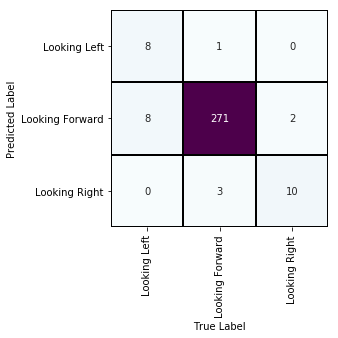

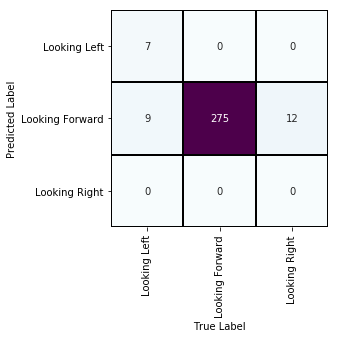

In [102]:
face_labels = ['Looking Left','Looking Forward', 'Looking Right']

matrix = confusion_matrix(y_test, y_pred)
matrix_red = confusion_matrix(y_test_red, y_pred_red)

sea.heatmap(matrix.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = face_labels, cmap = "BuPu", linecolor = 'black', linewidths = 1,
            yticklabels = face_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.show()

sea.heatmap(matrix_red.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = face_labels, cmap = "BuPu", linecolor = 'black', linewidths = 1,
            yticklabels = face_labels)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
plt.show()

In [103]:
print('SVM accuracy (Original Data) is: ', classifier.score(X_test, y_test))
print('SVM accuracy (Reduced Data) is: ', classifier_red.score(X_test_red, y_test_red))

SVM accuracy (Original Data) is:  0.9537953795379538
SVM accuracy (Reduced Data) is:  0.9306930693069307


In [104]:
print(classification_report(y_test, y_pred))
print(" ")
print(classification_report(y_test_red, y_pred_red))

              precision    recall  f1-score   support

           1       0.89      0.50      0.64        16
           2       0.96      0.99      0.97       275
           3       0.77      0.83      0.80        12

   micro avg       0.95      0.95      0.95       303
   macro avg       0.87      0.77      0.80       303
weighted avg       0.95      0.95      0.95       303

 
              precision    recall  f1-score   support

           1       1.00      0.44      0.61        16
           2       0.93      1.00      0.96       275
           3       0.00      0.00      0.00        12

   micro avg       0.93      0.93      0.93       303
   macro avg       0.64      0.48      0.52       303
weighted avg       0.90      0.93      0.91       303



/usr/lib/python3/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
print('SVM Classification accuracy (Original Data) is: ', metrics.accuracy_score(y_test, y_pred))
print("")
print('SVM Classification accuracy (Reduced Data) is: ', metrics.accuracy_score(y_test_red, y_pred_red))

SVM Classification accuracy (Original Data) is:  0.9537953795379538

SVM Classification accuracy (Reduced Data) is:  0.9306930693069307


# SVM Regression

In [106]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

regression = SVR(kernel = 'rbf', gamma = 'auto')
regression_red = SVR(kernel = 'rbf', gamma = 'auto')

regression.fit(X, y)
regression_red.fit(X_red, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [107]:
y = np.reshape(y, (-1,1))

In [108]:
print(dataset[-20:][0:])

                         subject  imgNum  label  ang   xF   yF   wF   hF  xRE  \
fileName                                                                        
20130530_04_Driv_071_f         4      71      2   15  325  175  111  138  361   
20130530_04_Driv_072_f         4      72      2   15  324  178  107  131  358   
20130530_04_Driv_073_f         4      73      2    0  310  177  121  137  346   
20130530_04_Driv_074_f         4      74      2    0  302  175  128  136  337   
20130530_04_Driv_075_f         4      75      2    0  298  172  121  143  324   
20130530_04_Driv_076_f         4      76      2  -15  290  178  120  144  319   
20130530_04_Driv_077_f         4      77      2  -15  288  181  119  141  316   
20130530_04_Driv_078_f         4      78      2  -15  288  180  111  123  315   
20130530_04_Driv_079_f         4      79      2  -15  280  175  120  149  313   
20130530_04_Driv_080_f         4      80      2  -15  282  189  116  131  313   
20130530_04_Driv_081_f      

In [109]:
print(X_red[-20:][:])

[[-84.00253959 -57.0805435    5.57792248]
 [-77.8104238  -53.13734536   1.62702648]
 [-72.36765624 -25.54447557   9.85528829]
 [-71.44456477  -5.50489891  11.04964754]
 [-73.98081655  21.54131243  20.31838816]
 [-55.94152588  39.31990825  22.33687789]
 [-56.23157408  43.61667484  19.538421  ]
 [-58.00148363  45.57818687   3.80064555]
 [-55.8603768   52.26569173  27.91804563]
 [-36.02209906  55.23539011  12.79240184]
 [-43.79761978  53.17601118   9.76978859]
 [-46.05464292  53.0047717   10.98666823]
 [-49.29078018  55.97372504  18.70755811]
 [-47.28260754  60.05026168  10.80967569]
 [-48.85227538  56.90935088  19.16849319]
 [-38.4823047   67.13408147  21.87030792]
 [-31.96731054  91.38591918  16.57322672]
 [-31.95085066 115.98117104  17.35342064]
 [-65.46335867  93.97339745  18.32652384]
 [-75.89991244  75.11178559  17.6630584 ]]


In [110]:
# Predict for imgNum 90 for original and reduced data.  Expecting label = 2
y_pred = regression.predict([[266, 170, 141, 139, 303, 206, 354, 198, 331, 229, 319, 255, 362, 247]])
y_pred_red = regression_red.predict([[-75.89991244, 75.11178559, 17.6630584]])

print(y_pred)
print(y_pred_red)

[2.08165714]
[2.07873515]


In [111]:
# Predict for imgNum 88 for original and reduced data. Expecting label = 1
y_pred = regression.predict([[268, 186, 128, 134, 296, 222, 344, 212, 319, 247, 316, 274, 347, 269]])
y_pred_red = regression_red.predict([[-31.96731054, 91.38591918, 16.57322672]])

print(y_pred)
print(y_pred_red)

[1.09964487]
[1.09992151]


In [112]:
print('SVR accuracy (Original Data) is: ', regression.score(X_test, y_test))
print('SVR accuracy (Reduced Data) is: ', regression_red.score(X_test_red, y_test_red))

SVR accuracy (Original Data) is:  -0.09755658003981038
SVR accuracy (Reduced Data) is:  -0.09163894002575668


In [113]:
y = y.reshape(-1, 1)

import warnings
warnings.filterwarnings('ignore')

In [114]:
log_regression = LogisticRegression()
print(cross_val_score(log_regression, X_train, y_train, cv = 10, scoring = "accuracy").mean())

0.9275757575757575


# Linear Regression

In [115]:
from sklearn import datasets
from sklearn import preprocessing

diabetes = datasets.load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [116]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [117]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [118]:
# Pick 'bp'
X = diabetes.data[:, np.newaxis, 3]
y = diabetes.target
print(X)
print(y)

[[ 2.18723550e-02]
 [-2.63278347e-02]
 [-5.67061055e-03]
 [-3.66564468e-02]
 [ 2.18723550e-02]
 [-1.94420933e-02]
 [-1.59992226e-02]
 [ 6.66296740e-02]
 [-4.00993175e-02]
 [-3.32135761e-02]
 [ 8.10087222e-03]
 [-3.32135761e-02]
 [-9.11348125e-03]
 [ 8.10087222e-03]
 [-1.25563519e-02]
 [ 8.04011568e-02]
 [ 4.94153205e-02]
 [ 5.63010619e-02]
 [-3.66564468e-02]
 [-4.00993175e-02]
 [-4.35421882e-02]
 [ 1.21513083e-03]
 [-9.11348125e-03]
 [ 3.10533436e-02]
 [-2.28849640e-02]
 [-4.00993175e-02]
 [-2.63278347e-02]
 [-4.00993175e-02]
 [-7.45280244e-02]
 [ 6.31868033e-02]
 [-1.94420933e-02]
 [-8.14137658e-02]
 [ 2.87580964e-02]
 [-2.22773986e-03]
 [-5.73136710e-02]
 [-4.92803060e-02]
 [ 5.28581912e-02]
 [-5.73136710e-02]
 [ 9.76155103e-02]
 [-7.45280244e-02]
 [ 2.18723550e-02]
 [-1.08956731e-01]
 [-1.48515991e-02]
 [-7.10851537e-02]
 [ 8.10087222e-03]
 [ 3.22009671e-02]
 [-3.32135761e-02]
 [-5.73136710e-02]
 [ 1.15437429e-02]
 [-5.67061055e-03]
 [ 1.49866136e-02]
 [ 2.87580964e-02]
 [-5.6706105

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)

In [120]:
lin_reg = LinearRegression()

In [121]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
y_pred = lin_reg.predict(X_test)

In [123]:
print('Linear Regression accuracy (Original Data, bp) is: ', lin_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear Regression accuracy (Original Data, bp) is:  0.14171660665368413
RMSE: 71.75023012151485


In [124]:
# Try for 'bmi' instead.
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target
print(X)
print(y)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print('Linear Regression accuracy (Original Data, bmi) is: ', lin_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear Regression accuracy (Original Data, bmi) is:  0.3440122223004841
RMSE: 62.727187769740894


In [126]:
count = 0
for elem in diabetes.feature_names:
    X = diabetes.data[:, np.newaxis, count]
    y = diabetes.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)
    lin_reg = LinearRegression()
    lin_reg.fit(X, y)
    y_pred = lin_reg.predict(X_test)
    print("Linear Regression accuracy (Original Data, {}) is: {}".format(elem, lin_reg.score(X_test, y_test)))
    count = count + 1

Linear Regression accuracy (Original Data, age) is: 0.016632047556654705
Linear Regression accuracy (Original Data, sex) is: -0.0010208521499910361
Linear Regression accuracy (Original Data, bmi) is: 0.3455707299904236
Linear Regression accuracy (Original Data, bp) is: 0.14991957789063814
Linear Regression accuracy (Original Data, s1) is: 0.03785372894007688
Linear Regression accuracy (Original Data, s2) is: 0.024069411698512844
Linear Regression accuracy (Original Data, s3) is: 0.14500106975582294
Linear Regression accuracy (Original Data, s4) is: 0.17555246008621506
Linear Regression accuracy (Original Data, s5) is: 0.3288109714910701
Linear Regression accuracy (Original Data, s6) is: 0.149391121627106


In [127]:
# bmi returns the best linear regression accuracy @ 0.3455707299904237

In [128]:
feature_cols = ['age', 'sex', 'bmi', 'bp']

In [129]:
X = diabetes.data[:,[0,1,2,3]] 
X

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01728186],
       [-0.04547248, -0.04464164,  0.03906215,  0.00121513],
       [-0.04547248, -0.04464164, -0.0730303 , -0.08141377]])

In [130]:
y = diabetes.target

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [132]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
y_pred = lin_reg.predict(X_test)

In [134]:
print("Linear Regression accuracy (Reduced Features: 'age', 'sex', 'bmi', 'bp') is: ", lin_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Linear Regression accuracy (Reduced Features: 'age', 'sex', 'bmi', 'bp') is:  0.3798377656463689
RMSE: 63.41044541289172


In [135]:
# Removing all but 'age', 'sex', 'bmi', 'bp' we were able to achieve a lower root mean
# square error.

# Logistic Regression

In [136]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [137]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [138]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [139]:
# Pick 'bp'
X = diabetes.data[:, np.newaxis, 3]
y = diabetes.target
print(X)
print(y)

[[ 2.18723550e-02]
 [-2.63278347e-02]
 [-5.67061055e-03]
 [-3.66564468e-02]
 [ 2.18723550e-02]
 [-1.94420933e-02]
 [-1.59992226e-02]
 [ 6.66296740e-02]
 [-4.00993175e-02]
 [-3.32135761e-02]
 [ 8.10087222e-03]
 [-3.32135761e-02]
 [-9.11348125e-03]
 [ 8.10087222e-03]
 [-1.25563519e-02]
 [ 8.04011568e-02]
 [ 4.94153205e-02]
 [ 5.63010619e-02]
 [-3.66564468e-02]
 [-4.00993175e-02]
 [-4.35421882e-02]
 [ 1.21513083e-03]
 [-9.11348125e-03]
 [ 3.10533436e-02]
 [-2.28849640e-02]
 [-4.00993175e-02]
 [-2.63278347e-02]
 [-4.00993175e-02]
 [-7.45280244e-02]
 [ 6.31868033e-02]
 [-1.94420933e-02]
 [-8.14137658e-02]
 [ 2.87580964e-02]
 [-2.22773986e-03]
 [-5.73136710e-02]
 [-4.92803060e-02]
 [ 5.28581912e-02]
 [-5.73136710e-02]
 [ 9.76155103e-02]
 [-7.45280244e-02]
 [ 2.18723550e-02]
 [-1.08956731e-01]
 [-1.48515991e-02]
 [-7.10851537e-02]
 [ 8.10087222e-03]
 [ 3.22009671e-02]
 [-3.32135761e-02]
 [-5.73136710e-02]
 [ 1.15437429e-02]
 [-5.67061055e-03]
 [ 1.49866136e-02]
 [ 2.87580964e-02]
 [-5.6706105

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression accuracy (Original Data, bp) is: ', log_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Logistic Regression accuracy (Original Data, bp) is:  0.0
RMSE: 114.76832851779811


In [141]:
# Try for 'bmi'.
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target
print(X)
print(y)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Logistic Regression accuracy (Original Data, bmi) is: ', log_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Logistic Regression accuracy (Original Data, bmi) is:  0.00904977375565611
RMSE: 117.77194389679899


In [143]:
feature_cols = ['age', 'sex', 'bmi', 'bp']

In [144]:
X = diabetes.data[:,[0,1,2,3]] 
X

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626,  0.01728186],
       [-0.04547248, -0.04464164,  0.03906215,  0.00121513],
       [-0.04547248, -0.04464164, -0.0730303 , -0.08141377]])

In [145]:
y = diabetes.target

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

In [147]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [148]:
y_pred = log_reg.predict(X_test)

In [149]:
print("Logistic Regression accuracy (Reduced Features: 'age', 'sex', 'bmi', 'bp') is: ", log_reg.score(X_test, y_test))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Logistic Regression accuracy (Reduced Features: 'age', 'sex', 'bmi', 'bp') is:  0.0
RMSE: 118.92105034944913


# Results

In [150]:
Summary of Classification Results:

SyntaxError: invalid syntax (<ipython-input-150-605a9f9aab1c>, line 1)